Google Colab Link: https://colab.research.google.com/drive/18vD2St6YDztwcggZJoHv3S7xSXytO4rk?usp=sharing

## Load training dataset

Please add a folder to your drive named Kaggle_Project_Cs412 which contains test.csv and train.csv files.

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Kaggle_Project_Cs412/

/content/drive/MyDrive/Kaggle_Project_Cs412


In [ ]:
ls

test.csv  train.csv


In [ ]:
# Library loading section
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import keras.utils
from tensorflow.keras import utils as np_utils
from tensorflow.keras.utils import to_categorical

In [ ]:
train_df = pd.read_csv("train.csv")
# show first 10 elements of the training data
train_df.head(10)

,ID,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price
0,0,vw,Golf,2020.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,NaN,34495
1,1,audi,A3,2014.0,Manual,48037.0,Diesel,74.3,1.6,0.0,NaN,12239
2,2,ford,Focus,2019.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,NaN,17000
3,3,toyota,Yaris,2014.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,NaN,10499
4,4,ford,Focus,2014.0,Manual,45158.0,Petrol,56.5,1.0,30.0,NaN,7490
5,5,hyundi,Tucson,2019.0,Semi-Auto,6650.0,Hybrid,50.4,1.6,NaN,145.0,26990
6,6,merc,E Class,2014.0,Automatic,75833.0,Diesel,57.7,2.1,125.0,NaN,11972
7,7,vw,Tiguan,2019.0,Manual,107.0,Petrol,40.9,1.5,145.0,NaN,21990
8,8,vw,Passat,2015.0,Manual,30143.0,Diesel,70.6,1.6,20.0,NaN,9750
9,9,bmw,X1,2019.0,Semi-Auto,7555.0,Petrol,40.9,1.5,145.0,NaN,25450


In [ ]:
print("Data dimensionality is:", train_df.shape)
print("Data features are as follows:", train_df.columns, "\n")
print("Data types are as follows:")
train_df.dtypes

Data dimensionality is: (60000, 12)
Data features are as follows: Index(['ID', 'brand', 'model', 'year', 'transmission', 'mileage', 'fuelType',
       'mpg', 'engineSize', 'tax', 'tax(£)', 'price'],
      dtype='object') 

Data types are as follows:


ID                int64
brand            object
model            object
year            float64
transmission     object
mileage         float64
fuelType         object
mpg             float64
engineSize      float64
tax             float64
tax(£)          float64
price             int64
dtype: object

In [ ]:
# also give some statistics about the data like mean, standard deviation etc.
print("General statistics of the numerical features are as follows;")
train_df.describe()

General statistics of the numerical features are as follows;


,ID,year,mileage,mpg,engineSize,tax,tax(£),price
count,60000.000000,59941.000000,59934.000000,59936.000000,59948.000000,56628.000000,3372.000000,60000.000000
mean,29999.500000,2017.109791,22983.258985,55.739467,1.702292,118.714858,121.279656,17842.408150
std,17320.652413,2.118355,21281.736957,16.531590,0.585315,64.851610,58.511531,10206.177713
min,0.000000,1970.000000,2.000000,1.100000,0.000000,0.000000,0.000000,495.000000
25%,14999.750000,2016.000000,7035.500000,47.100000,1.200000,125.000000,125.000000,10795.000000
50%,29999.500000,2017.000000,17186.000000,55.400000,1.600000,145.000000,145.000000,15750.000000
75%,44999.250000,2019.000000,32407.000000,62.800000,2.000000,145.000000,145.000000,21998.000000
max,59999.000000,2020.000000,323003.000000,470.800000,6.600000,580.000000,555.000000,159999.000000


In [ ]:
train_df.isnull().sum()

ID                  0
brand              66
model              60
year               59
transmission       52
mileage            66
fuelType           70
mpg                64
engineSize         52
tax              3372
tax(£)          56628
price               0
dtype: int64

**Here, we have labeled the empty brand values as unknown-brand**

In [ ]:
train_df.fillna({"brand":"unknown-brand"}, inplace = True)

In [ ]:
train_df.isnull().sum()

ID                  0
brand               0
model              60
year               59
transmission       52
mileage            66
fuelType           70
mpg                64
engineSize         52
tax              3372
tax(£)          56628
price               0
dtype: int64

In [ ]:
train_df.corr().style.background_gradient(cmap = 'coolwarm')

,ID,year,mileage,mpg,engineSize,tax,tax(£),price
ID,1.000000,-0.000191,-0.000517,0.000728,0.005202,-0.002048,0.021099,0.004285
year,-0.000191,1.000000,-0.744589,-0.137330,-0.035766,0.209365,0.241393,0.503388
mileage,-0.000517,-0.744589,1.000000,0.184649,0.105415,-0.226317,-0.188928,-0.430598
mpg,0.000728,-0.137330,0.184649,1.000000,-0.285945,-0.438297,-0.479663,-0.340773
engineSize,0.005202,-0.035766,0.105415,-0.285945,1.000000,0.315618,0.230743,0.638214
tax,-0.002048,0.209365,-0.226317,-0.438297,0.315618,1.000000,nan,0.349616
tax(£),0.021099,0.241393,-0.188928,-0.479663,0.230743,nan,1.000000,0.316598
price,0.004285,0.503388,-0.430598,-0.340773,0.638214,0.349616,0.316598,1.000000


## Data Exploration

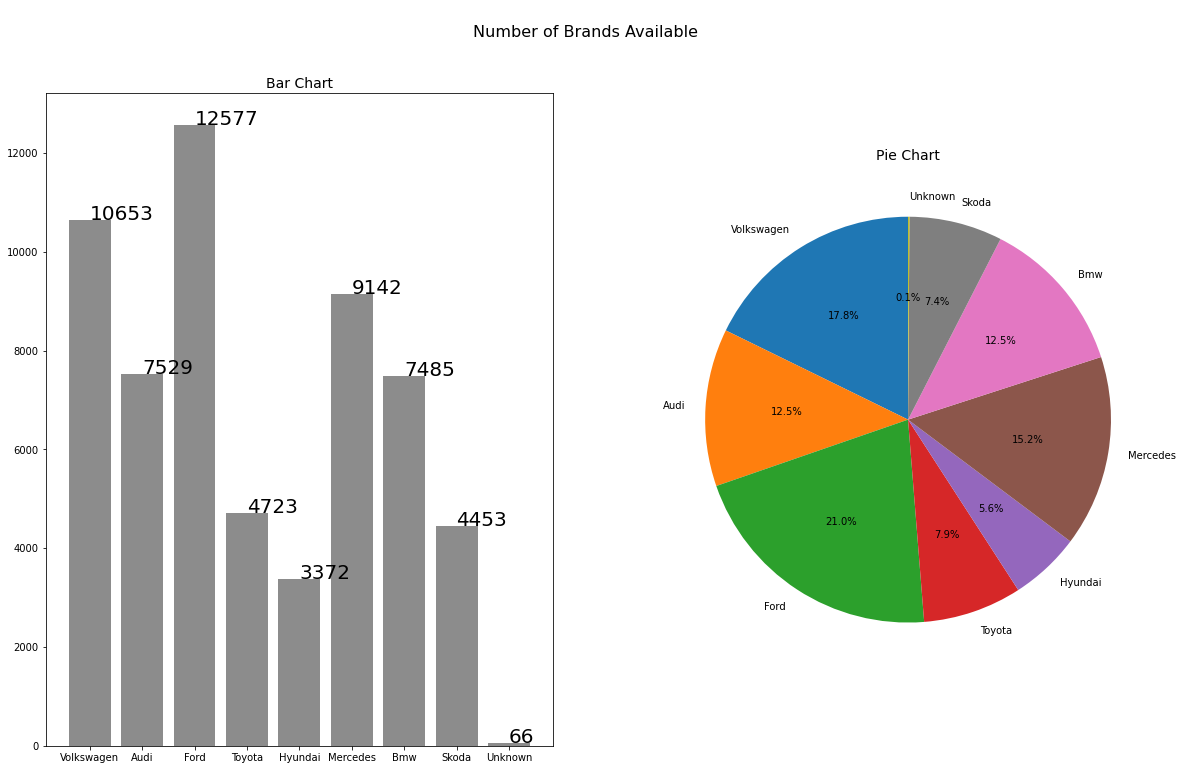

In [ ]:
Bar_points = ["Volkswagen", "Audi", "Ford", "Toyota", "Hyundai", "Mercedes", "Bmw", "Skoda", "Unknown" ]
Bar_data = [train_df[train_df['brand'] == 'vw'].shape[0],train_df[train_df['brand'] == 'audi'].shape[0]
            ,train_df[train_df['brand'] == 'ford'].shape[0], train_df[train_df['brand'] == 'toyota'].shape[0],
            train_df[train_df['brand'] == 'hyundi'].shape[0], train_df[train_df['brand'] == 'merc'].shape[0],
            train_df[train_df['brand'] == 'bmw'].shape[0], train_df[train_df['brand'] == 'skoda'].shape[0],
            train_df[train_df['brand'] == 'unknown-brand'].shape[0]]
fig, axes = plt.subplots(1, 2 , sharex= False ,sharey= False, figsize = (20,12))
axes[0].bar(Bar_points, Bar_data, color = "gray", alpha = 0.9 )

for index, value in enumerate(Bar_data):
    axes[0].text(index, value, str(value), fontsize = 20)
axes[0].set_title("Bar Chart",fontsize = 14)
axes[1].pie(Bar_data, labels=Bar_points, autopct = '%1.1f%%', shadow= False , startangle=90 )
axes[1].set_title("Pie Chart",fontsize = 14)
fig.suptitle("\nNumber of Brands Available\n", fontsize = 16)

plt.show()

## Data Preprocessing

In [ ]:
train_df.head()

,ID,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price
0,0,vw,Golf,2020.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,NaN,34495
1,1,audi,A3,2014.0,Manual,48037.0,Diesel,74.3,1.6,0.0,NaN,12239
2,2,ford,Focus,2019.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,NaN,17000
3,3,toyota,Yaris,2014.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,NaN,10499
4,4,ford,Focus,2014.0,Manual,45158.0,Petrol,56.5,1.0,30.0,NaN,7490


In [ ]:
test_df = pd.read_csv("test.csv")
test_df.head(5)

,ID,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£)
0,0,ford,Edge,2017.0,Manual,18116.0,Diesel,48.7,2.0,145.0,NaN
1,1,merc,CLA Class,2020.0,Automatic,1007.0,Petrol,44.8,1.3,145.0,NaN
2,2,bmw,1 Series,2017.0,Manual,24766.0,Petrol,56.5,1.5,150.0,NaN
3,3,audi,Q3,2017.0,Manual,29860.0,Diesel,50.4,2.0,145.0,NaN
4,4,vw,Golf,2016.0,Manual,12822.0,Petrol,39.8,2.0,200.0,NaN


### Eliminating unknown brands

In [ ]:
train_df[train_df["brand"] == "unknown-brand"]

,ID,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price
267,267,unknown-brand,Fabia,2017.0,Manual,25775.0,Petrol,58.9,1.2,145.0,NaN,9890
481,481,unknown-brand,Yeti Outdoor,2017.0,Semi-Auto,715.0,Petrol,51.4,1.2,125.0,NaN,15990
3421,3421,unknown-brand,Tiguan,2019.0,Manual,7005.0,Diesel,47.9,2.0,145.0,NaN,22794
3594,3594,unknown-brand,A4,2019.0,Manual,758.0,Petrol,39.2,2.0,145.0,NaN,26990
4830,4830,unknown-brand,Kodiaq,2019.0,Automatic,855.0,Petrol,36.7,1.5,145.0,NaN,26995
...,...,...,...,...,...,...,...,...,...,...,...,...
56537,56537,unknown-brand,Ka+,2019.0,Manual,14295.0,Petrol,47.9,1.2,150.0,NaN,8991
56577,56577,unknown-brand,Fiesta,2017.0,Manual,24643.0,Petrol,54.3,1.2,125.0,NaN,6717
56999,56999,unknown-brand,Citigo,2016.0,Manual,27523.0,Petrol,62.8,1.0,20.0,NaN,5990
57861,57861,unknown-brand,C Class,2016.0,Semi-Auto,10004.0,Diesel,65.7,2.1,30.0,NaN,23999


In [ ]:
train_df.brand.unique()

array(['vw', 'audi', 'ford', 'toyota', 'hyundi', 'merc', 'bmw', 'skoda',
       'unknown-brand'], dtype=object)

In [ ]:
test_df.brand.unique()

array(['ford', 'merc', 'bmw', 'audi', 'vw', 'toyota', 'skoda', 'hyundi',
       nan], dtype=object)

In [ ]:
test_df.fillna({"brand":"unknown-brand"}, inplace = True)
test_df.isnull().sum()

ID                  0
brand               0
model              27
year               29
transmission       22
mileage            30
fuelType           23
mpg                29
engineSize         18
tax              1488
tax(£)          24067
dtype: int64

In [ ]:
model_df = train_df.dropna(subset=['model'])
vw_models1 = model_df[model_df["brand"] == "vw"].model.unique()
audi_models1 = model_df[model_df["brand"] == "audi"].model.unique()
ford_models1 = model_df[model_df["brand"] == "ford"].model.unique()
toyota_models1 = model_df[model_df["brand"] == "toyota"].model.unique()
hyundai_models1 = model_df[model_df["brand"] == "hyundi"].model.unique()
mercedes_models1 = model_df[model_df["brand"] == "merc"].model.unique()
bmw_models1 = model_df[model_df["brand"] == "bmw"].model.unique()
skoda_models1 = model_df[model_df["brand"] == "skoda"].model.unique()

model2_df = test_df.dropna(subset=['model'])
vw_models2 = model2_df[model2_df["brand"] == "vw"].model.unique()
audi_models2 = model2_df[model2_df["brand"] == "audi"].model.unique()
ford_models2 = model2_df[model2_df["brand"] == "ford"].model.unique()
toyota_models2 = model2_df[model2_df["brand"] == "toyota"].model.unique()
hyundai_models2 = model2_df[model2_df["brand"] == "hyundi"].model.unique()
mercedes_models2 = model2_df[model2_df["brand"] == "merc"].model.unique()
bmw_models2 = model2_df[model2_df["brand"] == "bmw"].model.unique()
skoda_models2 = model2_df[model2_df["brand"] == "skoda"].model.unique()

vw_models= sorted(list(set(vw_models1) | set(vw_models2)))
audi_models = sorted(list(set(audi_models1) | set(audi_models2)))
ford_models = sorted(list(set(ford_models1) | set(ford_models2)))
toyota_models = sorted(list(set(toyota_models1) | set(toyota_models2)))
hyundai_models = sorted(list(set(hyundai_models1) | set(hyundai_models2)))
mercedes_models = sorted(list(set(mercedes_models1) | set(mercedes_models2)))
bmw_models = sorted(list(set(bmw_models1) | set(bmw_models2)))
skoda_models = sorted(list(set(skoda_models1) | set(skoda_models2)))

print("Volkswagen")
print(vw_models)
print("\n")
print("Audi")
print(audi_models)
print("\n")
print("Ford")
print(ford_models)
print("\n")
print("Toyota")
print(toyota_models)
print("\n")
print("Hyundai")
print(hyundai_models)
print("\n")
print("Mercedes")
print(mercedes_models)
print("\n")
print("Bmw")
print(bmw_models)
print("\n")
print("Skoda")
print(skoda_models)
print("\n")

Volkswagen
[' Amarok', ' Arteon', ' Beetle', ' CC', ' Caddy', ' Caddy Life', ' Caddy Maxi', ' Caddy Maxi Life', ' California', ' Caravelle', ' Eos', ' Fox', ' Golf', ' Golf SV', ' Jetta', ' Passat', ' Polo', ' Scirocco', ' Sharan', ' Shuttle', ' T-Cross', ' T-Roc', ' Tiguan', ' Tiguan Allspace', ' Touareg', ' Touran', ' Up']


Audi
[' A1', ' A2', ' A3', ' A4', ' A5', ' A6', ' A7', ' A8', ' Q2', ' Q3', ' Q5', ' Q7', ' Q8', ' R8', ' RS3', ' RS4', ' RS5', ' RS6', ' RS7', ' S3', ' S4', ' S5', ' S8', ' SQ5', ' SQ7', ' TT']


Ford
[' B-MAX', ' C-MAX', ' EcoSport', ' Edge', ' Escort', ' Fiesta', ' Focus', ' Fusion', ' Galaxy', ' Grand C-MAX', ' Grand Tourneo Connect', ' KA', ' Ka+', ' Kuga', ' Mondeo', ' Mustang', ' Puma', ' Ranger', ' S-MAX', ' Streetka', ' Tourneo Connect', ' Tourneo Custom', ' Transit Tourneo']


Toyota
[' Auris', ' Avensis', ' Aygo', ' C-HR', ' Camry', ' Corolla', ' GT86', ' Hilux', ' IQ', ' Land Cruiser', ' PROACE VERSO', ' Prius', ' RAV4', ' Supra', ' Urban Cruiser', ' 

In [ ]:
vw_models

[' Amarok',
 ' Arteon',
 ' Beetle',
 ' CC',
 ' Caddy',
 ' Caddy Life',
 ' Caddy Maxi',
 ' Caddy Maxi Life',
 ' California',
 ' Caravelle',
 ' Eos',
 ' Fox',
 ' Golf',
 ' Golf SV',
 ' Jetta',
 ' Passat',
 ' Polo',
 ' Scirocco',
 ' Sharan',
 ' Shuttle',
 ' T-Cross',
 ' T-Roc',
 ' Tiguan',
 ' Tiguan Allspace',
 ' Touareg',
 ' Touran',
 ' Up']

In [ ]:
def unknown_categorizer(row):
  if row["brand"] == "unknown-brand":
    objectbrand = "unknown-brand"
    for itervalue in vw_models:
      if itervalue == row["model"]:
        objectbrand = "vw"
    for itervalue in audi_models:
      if itervalue == row["model"]:
        objectbrand = "audi"
    for itervalue in ford_models:
      if itervalue == row["model"]:
        objectbrand = "ford"
    for itervalue in toyota_models:
      if itervalue == row["model"]:
        objectbrand = "toyota"
    for itervalue in hyundai_models:
      if itervalue == row["model"]:
        objectbrand = "hyundi"
    for itervalue in mercedes_models:
      if itervalue == row["model"]:
        objectbrand = "merc"
    for itervalue in bmw_models:
      if itervalue == row["model"]:
        objectbrand = "bmw"
    for itervalue in skoda_models:
      if itervalue == row["model"]:
        objectbrand = "skoda"
    return objectbrand
  else:
    return row["brand"]


train_df["brand"] = train_df.apply(unknown_categorizer, axis=1)



In [ ]:
train_df.isnull().sum()

ID                  0
brand               0
model              60
year               59
transmission       52
mileage            66
fuelType           70
mpg                64
engineSize         52
tax              3372
tax(£)          56628
price               0
dtype: int64

In [ ]:
train_df.brand.unique()

array(['vw', 'audi', 'ford', 'toyota', 'hyundi', 'merc', 'bmw', 'skoda'],
      dtype=object)

In [ ]:
train_df.head(10)

,ID,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price
0,0,vw,Golf,2020.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,NaN,34495
1,1,audi,A3,2014.0,Manual,48037.0,Diesel,74.3,1.6,0.0,NaN,12239
2,2,ford,Focus,2019.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,NaN,17000
3,3,toyota,Yaris,2014.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,NaN,10499
4,4,ford,Focus,2014.0,Manual,45158.0,Petrol,56.5,1.0,30.0,NaN,7490
5,5,hyundi,Tucson,2019.0,Semi-Auto,6650.0,Hybrid,50.4,1.6,NaN,145.0,26990
6,6,merc,E Class,2014.0,Automatic,75833.0,Diesel,57.7,2.1,125.0,NaN,11972
7,7,vw,Tiguan,2019.0,Manual,107.0,Petrol,40.9,1.5,145.0,NaN,21990
8,8,vw,Passat,2015.0,Manual,30143.0,Diesel,70.6,1.6,20.0,NaN,9750
9,9,bmw,X1,2019.0,Semi-Auto,7555.0,Petrol,40.9,1.5,145.0,NaN,25450


In [ ]:
train_df.iloc[3421]

ID                 3421
brand                vw
model            Tiguan
year               2019
transmission     Manual
mileage            7005
fuelType         Diesel
mpg                47.9
engineSize            2
tax                 145
tax(£)              NaN
price             22794
Name: 3421, dtype: object

**We have transformed unknown brands to unique brands that we currently have in the dataset with respect to their given models**

### Year to Age conversion

In [ ]:
train_df.isnull().sum()

ID                  0
brand               0
model              60
year               59
transmission       52
mileage            66
fuelType           70
mpg                64
engineSize         52
tax              3372
tax(£)          56628
price               0
dtype: int64

In [ ]:
train_df.year.median()

2017.0

In [ ]:
train_df.fillna({"year":train_df.year.median()}, inplace = True) 

In [ ]:
from datetime import datetime
def age_calculator(birth):
  if birth == 2030:
    return 
  return datetime.now().year - birth

train_df.rename(columns={'year': 'age'}, inplace=True)

train_df["age"] = train_df["age"].apply(age_calculator).astype(float)
train_df.head(10)

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price
0,0,vw,Golf,2.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,NaN,34495
1,1,audi,A3,8.0,Manual,48037.0,Diesel,74.3,1.6,0.0,NaN,12239
2,2,ford,Focus,3.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,NaN,17000
3,3,toyota,Yaris,8.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,NaN,10499
4,4,ford,Focus,8.0,Manual,45158.0,Petrol,56.5,1.0,30.0,NaN,7490
5,5,hyundi,Tucson,3.0,Semi-Auto,6650.0,Hybrid,50.4,1.6,NaN,145.0,26990
6,6,merc,E Class,8.0,Automatic,75833.0,Diesel,57.7,2.1,125.0,NaN,11972
7,7,vw,Tiguan,3.0,Manual,107.0,Petrol,40.9,1.5,145.0,NaN,21990
8,8,vw,Passat,7.0,Manual,30143.0,Diesel,70.6,1.6,20.0,NaN,9750
9,9,bmw,X1,3.0,Semi-Auto,7555.0,Petrol,40.9,1.5,145.0,NaN,25450


In [ ]:
train_df.isnull().sum()

ID                  0
brand               0
model              60
age                 0
transmission       52
mileage            66
fuelType           70
mpg                64
engineSize         52
tax              3372
tax(£)          56628
price               0
dtype: int64

In [ ]:
train_df.age.describe()

count    60000.000000
mean         4.890317
std          2.117316
min          2.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         52.000000
Name: age, dtype: float64

In [ ]:
train_df[train_df["age"] == 51]

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price


**Year was an unneccessary why because differentiating between 2018 and 2019 does not make any sense. Thus, we converted it to car age. we labeled the na values as 2030. Hence, their age is currently 0. We will research the optimal approach for giving the correct and precise value for na ones**

### Tax merging phase

In [ ]:
def tax_converter(row):
  if row["tax(£)"] == -2000:
    return row["tax"]
  else:
    return row["tax(£)"]*1.30 

train_df.fillna({"tax(£)":-2000}, inplace = True)

train_df["tax"] = train_df.apply(tax_converter, axis=1)
train_df.head(20)

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price
0,0,vw,Golf,2.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,-2000.0,34495
1,1,audi,A3,8.0,Manual,48037.0,Diesel,74.3,1.6,0.0,-2000.0,12239
2,2,ford,Focus,3.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,-2000.0,17000
3,3,toyota,Yaris,8.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,-2000.0,10499
4,4,ford,Focus,8.0,Manual,45158.0,Petrol,56.5,1.0,30.0,-2000.0,7490
5,5,hyundi,Tucson,3.0,Semi-Auto,6650.0,Hybrid,50.4,1.6,188.5,145.0,26990
6,6,merc,E Class,8.0,Automatic,75833.0,Diesel,57.7,2.1,125.0,-2000.0,11972
7,7,vw,Tiguan,3.0,Manual,107.0,Petrol,40.9,1.5,145.0,-2000.0,21990
8,8,vw,Passat,7.0,Manual,30143.0,Diesel,70.6,1.6,20.0,-2000.0,9750
9,9,bmw,X1,3.0,Semi-Auto,7555.0,Petrol,40.9,1.5,145.0,-2000.0,25450


In [ ]:
train_df.drop(["tax(£)"], axis = 1, inplace=True)
train_df.head(6)

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax,price
0,0,vw,Golf,2.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,34495
1,1,audi,A3,8.0,Manual,48037.0,Diesel,74.3,1.6,0.0,12239
2,2,ford,Focus,3.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,17000
3,3,toyota,Yaris,8.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,10499
4,4,ford,Focus,8.0,Manual,45158.0,Petrol,56.5,1.0,30.0,7490
5,5,hyundi,Tucson,3.0,Semi-Auto,6650.0,Hybrid,50.4,1.6,188.5,26990


**Now, what we did was we convert the tax price from gbp to usd by multiplying with the current difference which was 1.30. Then, we dropped the tax(£) because we did not need anymore**

### Tax Free or not (Adding more attributes part)

In [ ]:
def tax_checker(row):
  if row["tax"] == 0:
    return 0  #tax
  else:
    return 1  #taxfree


train_df["taxorNot"] = train_df.apply(tax_checker, axis=1)
train_df = train_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'fuelType', 'mpg', 'engineSize', 'tax', 'taxorNot', 'price'])
train_df.head(20)

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax,taxorNot,price
0,0,vw,Golf,2.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,1,34495
1,1,audi,A3,8.0,Manual,48037.0,Diesel,74.3,1.6,0.0,0,12239
2,2,ford,Focus,3.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,1,17000
3,3,toyota,Yaris,8.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,0,10499
4,4,ford,Focus,8.0,Manual,45158.0,Petrol,56.5,1.0,30.0,1,7490
5,5,hyundi,Tucson,3.0,Semi-Auto,6650.0,Hybrid,50.4,1.6,188.5,1,26990
6,6,merc,E Class,8.0,Automatic,75833.0,Diesel,57.7,2.1,125.0,1,11972
7,7,vw,Tiguan,3.0,Manual,107.0,Petrol,40.9,1.5,145.0,1,21990
8,8,vw,Passat,7.0,Manual,30143.0,Diesel,70.6,1.6,20.0,1,9750
9,9,bmw,X1,3.0,Semi-Auto,7555.0,Petrol,40.9,1.5,145.0,1,25450


In [ ]:
train_df[train_df["taxorNot"] == 0]

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax,taxorNot,price
1,1,audi,A3,8.0,Manual,48037.0,Diesel,74.3,1.6,0.0,0,12239
3,3,toyota,Yaris,8.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,0,10499
13,13,merc,C Class,6.0,Automatic,72681.0,Hybrid,134.5,2.0,0.0,0,15495
32,32,toyota,Yaris,8.0,Automatic,56309.0,Hybrid,76.3,1.5,0.0,0,8998
38,38,vw,Golf,5.0,Semi-Auto,19166.0,Petrol,65.7,1.0,0.0,0,13995
...,...,...,...,...,...,...,...,...,...,...,...,...
59910,59910,bmw,i3,7.0,Automatic,79835.0,Hybrid,470.8,0.0,0.0,0,12500
59914,59914,ford,Fiesta,6.0,Manual,14539.0,Petrol,65.7,1.0,0.0,0,9600
59917,59917,merc,GLE Class,6.0,Semi-Auto,86370.0,Hybrid,76.4,3.0,0.0,0,25995
59927,59927,ford,Focus,6.0,Manual,32972.0,Diesel,74.3,1.5,0.0,0,9552


### Mileage classification (Adding more attributes part)

In [ ]:
train_df.mileage.describe()

count     59934.000000
mean      22983.258985
std       21281.736957
min           2.000000
25%        7035.500000
50%       17186.000000
75%       32407.000000
max      323003.000000
Name: mileage, dtype: float64

We want to classify mileage as low and high mileage. To classify mileage, we will act wit respect to this article https://www.motorbiscuit.com/high-low-mileage/

In [ ]:
train_df.isnull().sum()

ID               0
brand            0
model           60
age              0
transmission    52
mileage         66
fuelType        70
mpg             64
engineSize      52
tax              0
taxorNot         0
price            0
dtype: int64

In [ ]:
train_df.mileage.mean()

22983.25898488337

In [ ]:
train_df.fillna({"mileage":train_df.mileage.mean()}, inplace = True)

In [ ]:
def mileage_categorizer(row):
  if row['age'] == 0:
    return 0 #unknown
  perf = row['mileage']/row['age']
  if perf < 5000: #low
    return 3
  elif 5000 <= perf <= 12000:
    return 2 #average
  else:
    return 1 #high


train_df["mileage_class"] = train_df.apply(mileage_categorizer, axis=1)
train_df = train_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'mileage_class','fuelType', 'mpg', 'engineSize', 'tax', 'taxorNot', 'price'])
train_df.head(10)

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,mpg,engineSize,tax,taxorNot,price
0,0,vw,Golf,2.0,Semi-Auto,1506.0,3,Petrol,32.8,2.0,145.0,1,34495
1,1,audi,A3,8.0,Manual,48037.0,2,Diesel,74.3,1.6,0.0,0,12239
2,2,ford,Focus,3.0,Automatic,7267.0,3,Diesel,54.3,1.5,145.0,1,17000
3,3,toyota,Yaris,8.0,Automatic,8290.0,3,Hybrid,80.7,1.5,0.0,0,10499
4,4,ford,Focus,8.0,Manual,45158.0,2,Petrol,56.5,1.0,30.0,1,7490
5,5,hyundi,Tucson,3.0,Semi-Auto,6650.0,3,Hybrid,50.4,1.6,188.5,1,26990
6,6,merc,E Class,8.0,Automatic,75833.0,2,Diesel,57.7,2.1,125.0,1,11972
7,7,vw,Tiguan,3.0,Manual,107.0,3,Petrol,40.9,1.5,145.0,1,21990
8,8,vw,Passat,7.0,Manual,30143.0,3,Diesel,70.6,1.6,20.0,1,9750
9,9,bmw,X1,3.0,Semi-Auto,7555.0,3,Petrol,40.9,1.5,145.0,1,25450


In [ ]:
train_df[train_df["mileage_class"] == 1]

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,mpg,engineSize,tax,taxorNot,price
13,13,merc,C Class,6.0,Automatic,72681.0,1,Hybrid,134.5,2.0,0.0,0,15495
125,125,audi,A3,7.0,Manual,130008.0,1,Diesel,74.3,1.6,0.0,0,6793
177,177,merc,A Class,5.0,Manual,67270.0,1,Diesel,72.4,1.5,20.0,1,11500
217,217,bmw,5 Series,9.0,Automatic,143630.0,1,Diesel,57.6,2.0,120.0,1,8595
226,226,skoda,Superb,6.0,Manual,86196.0,1,Diesel,68.9,2.0,20.0,1,9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59225,59225,bmw,1 Series,8.0,Manual,131352.0,1,Diesel,74.3,1.6,0.0,0,5490
59531,59531,merc,A Class,7.0,Automatic,97940.0,1,Diesel,64.2,2.1,20.0,1,10500
59598,59598,bmw,3 Series,7.0,Automatic,105091.0,1,Diesel,62.8,2.0,30.0,1,10695
59762,59762,merc,E Class,5.0,Automatic,72464.0,1,Diesel,67.3,2.0,145.0,1,15800


### EngineSize classification (Adding more attributes part)

In [ ]:
train_df.isnull().sum()

ID                0
brand             0
model            60
age               0
transmission     52
mileage           0
mileage_class     0
fuelType         70
mpg              64
engineSize       52
tax               0
taxorNot          0
price             0
dtype: int64

In [ ]:
train_df.engineSize.describe()

count    59948.000000
mean         1.702292
std          0.585315
min          0.000000
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64

In [ ]:
train_df[train_df["engineSize"].isnull()]

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,mpg,engineSize,tax,taxorNot,price
1177,1177,vw,Tiguan,3.0,Manual,2964.0,3,Diesel,47.9,NaN,145.0,1,23750
1748,1748,ford,Mondeo,7.0,Manual,59298.0,2,Diesel,68.9,NaN,20.0,1,9221
1798,1798,toyota,Auris,7.0,Automatic,37644.0,2,Hybrid,72.4,NaN,0.0,0,12450
4320,4320,audi,A6,3.0,Automatic,2009.0,3,Diesel,47.9,NaN,145.0,1,35895
4940,4940,bmw,M4,2.0,Semi-Auto,2033.0,3,Petrol,34.0,NaN,145.0,1,49623
7046,7046,bmw,1 Series,7.0,Manual,43008.0,2,Petrol,50.4,NaN,125.0,1,8990
13061,13061,ford,Focus,4.0,Manual,8462.0,3,Petrol,51.4,NaN,145.0,1,15789
14211,14211,bmw,1 Series,5.0,Manual,24993.0,3,Diesel,70.6,NaN,145.0,1,16980
14650,14650,ford,Fiesta,10.0,Manual,52002.0,2,Petrol,50.4,NaN,125.0,1,4650
15089,15089,ford,Kuga,7.0,Manual,61794.0,2,Diesel,60.1,NaN,125.0,1,9298


In [ ]:
train_df[train_df["model"] == " i3"]

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,mpg,engineSize,tax,taxorNot,price
2201,2201,bmw,i3,5.0,Automatic,17344.0,3,Hybrid,470.8,0.0,135.0,1,19495
4249,4249,bmw,i3,5.0,Automatic,16874.0,3,Hybrid,470.8,0.0,135.0,1,21494
4503,4503,bmw,i3,5.0,Automatic,41148.0,2,Hybrid,470.8,0.0,0.0,0,19998
4717,4717,bmw,i3,7.0,Automatic,33940.0,3,Hybrid,470.8,0.0,0.0,0,15498
9709,9709,bmw,i3,5.0,Automatic,28174.0,2,Hybrid,470.8,0.0,0.0,0,23751
14849,14849,bmw,i3,5.0,Automatic,23964.0,3,Other,470.8,0.6,135.0,1,19500
22511,22511,bmw,i3,5.0,Automatic,29859.0,2,Hybrid,470.8,0.0,0.0,0,19895
24777,24777,bmw,i3,5.0,Automatic,22069.0,3,Hybrid,470.8,0.0,0.0,0,21444
28170,28170,bmw,i3,5.0,Automatic,26969.0,2,Hybrid,470.8,0.0,140.0,1,19980
35373,35373,bmw,i3,5.0,Automatic,26145.0,2,Hybrid,470.8,0.0,135.0,1,21490


In [ ]:
train_df.engineSize.median()

1.6

In [ ]:
#train_df.fillna({"engineSize": 1.7}, inplace = True)

def auto_dealer(row):
  if row["engineSize"] == -2:
    return round(train_df[(train_df["brand"] == row["brand"]) & (train_df["model"] == row["model"] )].engineSize.mean(), 2)
  else:
    return row["engineSize"]

train_df.fillna({"engineSize":-2}, inplace = True)
train_df["engineSize"] = train_df.apply(auto_dealer, axis = 1)
train_df.iloc[54158]

ID                54158
brand            toyota
model             Auris
age                   8
transmission     Manual
mileage           75138
mileage_class         2
fuelType         Diesel
mpg                74.3
engineSize         1.65
tax                   0
taxorNot              0
price              6498
Name: 54158, dtype: object

In [ ]:
def engine_checker(row):
  if row["engineSize"] < 1.3:
    return 1
  elif 1.3 <= row["engineSize"] < 1.6:
    return 2
  elif 1.6 <= row["engineSize"] < 2.0:
    return 3
  elif 2.0 <= row["engineSize"] < 20.0:
    return 4
  else:
    return 


train_df["engineClass"] = train_df.apply(engine_checker, axis=1)
train_df = train_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'mileage_class','fuelType', 'mpg', 'engineSize', 'engineClass', 'tax', 'taxorNot', 'price'])
train_df.head(20)

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,mpg,engineSize,engineClass,tax,taxorNot,price
0,0,vw,Golf,2.0,Semi-Auto,1506.0,3,Petrol,32.8,2.0,4,145.0,1,34495
1,1,audi,A3,8.0,Manual,48037.0,2,Diesel,74.3,1.6,3,0.0,0,12239
2,2,ford,Focus,3.0,Automatic,7267.0,3,Diesel,54.3,1.5,2,145.0,1,17000
3,3,toyota,Yaris,8.0,Automatic,8290.0,3,Hybrid,80.7,1.5,2,0.0,0,10499
4,4,ford,Focus,8.0,Manual,45158.0,2,Petrol,56.5,1.0,1,30.0,1,7490
5,5,hyundi,Tucson,3.0,Semi-Auto,6650.0,3,Hybrid,50.4,1.6,3,188.5,1,26990
6,6,merc,E Class,8.0,Automatic,75833.0,2,Diesel,57.7,2.1,4,125.0,1,11972
7,7,vw,Tiguan,3.0,Manual,107.0,3,Petrol,40.9,1.5,2,145.0,1,21990
8,8,vw,Passat,7.0,Manual,30143.0,3,Diesel,70.6,1.6,3,20.0,1,9750
9,9,bmw,X1,3.0,Semi-Auto,7555.0,3,Petrol,40.9,1.5,2,145.0,1,25450


### Fuel Type classification

In [ ]:
train_df.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', nan, 'Electric'],
      dtype=object)

In [ ]:
train_df.fillna({"fuelType":"unknown-fuelType"}, inplace = True)

In [ ]:
train_df.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'unknown-fuelType',
       'Electric'], dtype=object)

In [ ]:
def fueltype_checker(row):
  if row["fuelType"] == 'Electric':
    return 1
  elif row["fuelType"] == 'Hybrid':
    return 1
  else:
    return 0


train_df["Eco-friendly"] = train_df.apply(fueltype_checker, axis=1)
train_df = train_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'mileage_class','fuelType', "Eco-friendly", 'mpg', 'engineSize', 'engineClass', 'tax', 'taxorNot', 'price'])
train_df.head(10)

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,engineSize,engineClass,tax,taxorNot,price
0,0,vw,Golf,2.0,Semi-Auto,1506.0,3,Petrol,0,32.8,2.0,4,145.0,1,34495
1,1,audi,A3,8.0,Manual,48037.0,2,Diesel,0,74.3,1.6,3,0.0,0,12239
2,2,ford,Focus,3.0,Automatic,7267.0,3,Diesel,0,54.3,1.5,2,145.0,1,17000
3,3,toyota,Yaris,8.0,Automatic,8290.0,3,Hybrid,1,80.7,1.5,2,0.0,0,10499
4,4,ford,Focus,8.0,Manual,45158.0,2,Petrol,0,56.5,1.0,1,30.0,1,7490
5,5,hyundi,Tucson,3.0,Semi-Auto,6650.0,3,Hybrid,1,50.4,1.6,3,188.5,1,26990
6,6,merc,E Class,8.0,Automatic,75833.0,2,Diesel,0,57.7,2.1,4,125.0,1,11972
7,7,vw,Tiguan,3.0,Manual,107.0,3,Petrol,0,40.9,1.5,2,145.0,1,21990
8,8,vw,Passat,7.0,Manual,30143.0,3,Diesel,0,70.6,1.6,3,20.0,1,9750
9,9,bmw,X1,3.0,Semi-Auto,7555.0,3,Petrol,0,40.9,1.5,2,145.0,1,25450


In [ ]:
train_df.isnull().sum()

ID                0
brand             0
model            60
age               0
transmission     52
mileage           0
mileage_class     0
fuelType          0
Eco-friendly      0
mpg              64
engineSize        0
engineClass       0
tax               0
taxorNot          0
price             0
dtype: int64

In [ ]:
def fueltype_converter(row):
  if row["fuelType"] == 'Petrol':
    return 1
  elif row["fuelType"] == 'Diesel':
    return 2
  elif row["fuelType"] == 'Hybrid':
    return 3
  elif row["fuelType"] == 'Electric':
    return 4
  elif row["fuelType"] == 'Other':
    return 5
  else:
    return 5

train_df["fuelType"] = train_df.apply(fueltype_converter, axis=1)
train_df.head(10)

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,engineSize,engineClass,tax,taxorNot,price
0,0,vw,Golf,2.0,Semi-Auto,1506.0,3,1,0,32.8,2.0,4,145.0,1,34495
1,1,audi,A3,8.0,Manual,48037.0,2,2,0,74.3,1.6,3,0.0,0,12239
2,2,ford,Focus,3.0,Automatic,7267.0,3,2,0,54.3,1.5,2,145.0,1,17000
3,3,toyota,Yaris,8.0,Automatic,8290.0,3,3,1,80.7,1.5,2,0.0,0,10499
4,4,ford,Focus,8.0,Manual,45158.0,2,1,0,56.5,1.0,1,30.0,1,7490
5,5,hyundi,Tucson,3.0,Semi-Auto,6650.0,3,3,1,50.4,1.6,3,188.5,1,26990
6,6,merc,E Class,8.0,Automatic,75833.0,2,2,0,57.7,2.1,4,125.0,1,11972
7,7,vw,Tiguan,3.0,Manual,107.0,3,1,0,40.9,1.5,2,145.0,1,21990
8,8,vw,Passat,7.0,Manual,30143.0,3,2,0,70.6,1.6,3,20.0,1,9750
9,9,bmw,X1,3.0,Semi-Auto,7555.0,3,1,0,40.9,1.5,2,145.0,1,25450


In [ ]:
train_df.isnull().sum()

ID                0
brand             0
model            60
age               0
transmission     52
mileage           0
mileage_class     0
fuelType          0
Eco-friendly      0
mpg              64
engineSize        0
engineClass       0
tax               0
taxorNot          0
price             0
dtype: int64

###Milespergallon classification(Adding more attributes part)

In [ ]:
train_df.mpg.mean()

55.739467098232375

In [ ]:
#train_df.fillna({"mpg": 55.73}, inplace = True)

def mpg_dealer(row):
  if row["mpg"] == -3:
    return round(train_df[(train_df["brand"] == row["brand"]) & (train_df["model"] == row["model"] )].mpg.mean(), 2)
  else:
    return row["mpg"]

train_df.fillna({"mpg":-3}, inplace = True)
train_df["mpg"] = train_df.apply(mpg_dealer, axis = 1)
train_df.iloc[59184]

ID                59184
brand              audi
model                Q3
age                   7
transmission     Manual
mileage           55262
mileage_class         2
fuelType              2
Eco-friendly          0
mpg               45.82
engineSize            2
engineClass           4
tax                 125
taxorNot              1
price             14498
Name: 59184, dtype: object

In [ ]:
def mpg_checker(row):
  if row["mpg"] < 40:
    return 1
  elif 40 <= row["mpg"] < 80:
    return 2
  elif 80 <= row["mpg"] < 2000:
    return 3
  else:
    return 


train_df["mpg_class"] = train_df.apply(mpg_checker, axis=1)
train_df = train_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'mileage_class','fuelType', "Eco-friendly", 'mpg',"mpg_class" ,'engineSize', 'engineClass', 'tax', 'taxorNot', 'price'])
train_df.head(10)

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price
0,0,vw,Golf,2.0,Semi-Auto,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,34495
1,1,audi,A3,8.0,Manual,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,12239
2,2,ford,Focus,3.0,Automatic,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,17000
3,3,toyota,Yaris,8.0,Automatic,8290.0,3,3,1,80.7,3,1.5,2,0.0,0,10499
4,4,ford,Focus,8.0,Manual,45158.0,2,1,0,56.5,2,1.0,1,30.0,1,7490
5,5,hyundi,Tucson,3.0,Semi-Auto,6650.0,3,3,1,50.4,2,1.6,3,188.5,1,26990
6,6,merc,E Class,8.0,Automatic,75833.0,2,2,0,57.7,2,2.1,4,125.0,1,11972
7,7,vw,Tiguan,3.0,Manual,107.0,3,1,0,40.9,2,1.5,2,145.0,1,21990
8,8,vw,Passat,7.0,Manual,30143.0,3,2,0,70.6,2,1.6,3,20.0,1,9750
9,9,bmw,X1,3.0,Semi-Auto,7555.0,3,1,0,40.9,2,1.5,2,145.0,1,25450


### Age classification

In [ ]:
train_df.age.describe()

count    60000.000000
mean         4.890317
std          2.117316
min          2.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         52.000000
Name: age, dtype: float64

In [ ]:
def age_class(row):
  if row["age"] < 2:
    return 4
  elif 2 <= row["age"] < 4:
    return 3
  elif 4 <= row["age"] < 15:
    return 2
  elif 15 <= row["age"] < 52:
    return 1
  else:
    return 2


train_df["age_class"] = train_df.apply(age_class, axis=1)
train_df = train_df.reindex(columns=['ID','brand','model','age', "age_class",'transmission','mileage', 'mileage_class','fuelType', "Eco-friendly", 'mpg',"mpg_class" ,'engineSize', 'engineClass', 'tax', 'taxorNot', 'price'])
train_df.head(10)

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price
0,0,vw,Golf,2.0,3,Semi-Auto,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,34495
1,1,audi,A3,8.0,2,Manual,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,12239
2,2,ford,Focus,3.0,3,Automatic,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,17000
3,3,toyota,Yaris,8.0,2,Automatic,8290.0,3,3,1,80.7,3,1.5,2,0.0,0,10499
4,4,ford,Focus,8.0,2,Manual,45158.0,2,1,0,56.5,2,1.0,1,30.0,1,7490
5,5,hyundi,Tucson,3.0,3,Semi-Auto,6650.0,3,3,1,50.4,2,1.6,3,188.5,1,26990
6,6,merc,E Class,8.0,2,Automatic,75833.0,2,2,0,57.7,2,2.1,4,125.0,1,11972
7,7,vw,Tiguan,3.0,3,Manual,107.0,3,1,0,40.9,2,1.5,2,145.0,1,21990
8,8,vw,Passat,7.0,2,Manual,30143.0,3,2,0,70.6,2,1.6,3,20.0,1,9750
9,9,bmw,X1,3.0,3,Semi-Auto,7555.0,3,1,0,40.9,2,1.5,2,145.0,1,25450


### transmission converter

In [ ]:
train_df.transmission.unique()

array(['Semi-Auto', 'Manual', 'Automatic', nan, 'Other'], dtype=object)

In [ ]:
train_df.fillna({"transmission": "Other"}, inplace = True)

In [ ]:
def transmission_converter(row):
  if row["transmission"] == 'Manual':
    return 2
  elif row["transmission"] == 'Semi-Auto':
    return 3
  elif row["transmission"] == 'Automatic':
    return 4
  elif row["transmission"] == 'Other':
    return 1
  else:
    return 


train_df["transmission"] = train_df.apply(transmission_converter, axis=1)
train_df.head(10)

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price
0,0,vw,Golf,2.0,3,3,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,34495
1,1,audi,A3,8.0,2,2,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,12239
2,2,ford,Focus,3.0,3,4,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,17000
3,3,toyota,Yaris,8.0,2,4,8290.0,3,3,1,80.7,3,1.5,2,0.0,0,10499
4,4,ford,Focus,8.0,2,2,45158.0,2,1,0,56.5,2,1.0,1,30.0,1,7490
5,5,hyundi,Tucson,3.0,3,3,6650.0,3,3,1,50.4,2,1.6,3,188.5,1,26990
6,6,merc,E Class,8.0,2,4,75833.0,2,2,0,57.7,2,2.1,4,125.0,1,11972
7,7,vw,Tiguan,3.0,3,2,107.0,3,1,0,40.9,2,1.5,2,145.0,1,21990
8,8,vw,Passat,7.0,2,2,30143.0,3,2,0,70.6,2,1.6,3,20.0,1,9750
9,9,bmw,X1,3.0,3,3,7555.0,3,1,0,40.9,2,1.5,2,145.0,1,25450


In [ ]:
train_df.engineSize.unique()

array([2.  , 1.6 , 1.5 , 1.  , 2.1 , 1.8 , 1.4 , 1.2 , 2.3 , 1.7 , 3.  ,
       5.5 , 1.3 , 2.9 , 2.5 , 1.1 , 5.  , 0.  , 4.  , 2.7 , 4.2 , 2.4 ,
       4.4 , 2.2 , 2.8 , 1.9 , 4.7 , 1.88, 1.65, 3.2 , 3.5 , 2.21, 2.95,
       6.2 , 5.2 , 4.1 , 1.35, 4.3 , 0.6 , 1.42, 1.66, 1.81, 1.15, 0.99,
       6.6 , 2.03, 1.18, 2.19, 6.  , 2.25, 6.3 , 2.06, 1.76, 1.63, 1.67,
       1.07, 1.98, 1.39, 1.78, 1.68, 2.22])

In [ ]:
train_df.isnull().sum()

ID                0
brand             0
model            60
age               0
age_class         0
transmission      0
mileage           0
mileage_class     0
fuelType          0
Eco-friendly      0
mpg               0
mpg_class         0
engineSize        0
engineClass       0
tax               0
taxorNot          0
price             0
dtype: int64

In [ ]:
train_df[train_df["brand"] == "vw"]

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price
0,0,vw,Golf,2.0,3,3,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,34495
7,7,vw,Tiguan,3.0,3,2,107.0,3,1,0,40.9,2,1.5,2,145.0,1,21990
8,8,vw,Passat,7.0,2,2,30143.0,3,2,0,70.6,2,1.6,3,20.0,1,9750
15,15,vw,Golf,2.0,3,4,1007.0,3,3,1,141.3,3,1.4,2,135.0,1,29999
20,20,vw,Caddy Maxi Life,4.0,2,3,3968.0,3,2,0,56.5,2,2.0,4,145.0,1,20990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59988,59988,vw,Golf,6.0,2,3,28782.0,3,1,0,40.4,2,2.0,4,200.0,1,19741
59989,59989,vw,Golf,3.0,3,3,4460.0,3,1,0,47.1,2,1.5,2,145.0,1,17990
59990,59990,vw,Golf,4.0,2,3,17366.0,3,2,0,57.7,2,2.0,4,145.0,1,22490
59996,59996,vw,Golf,6.0,2,3,47006.0,2,1,0,40.4,2,2.0,4,200.0,1,17975


##Model Generating Process

### Random Forest Regressor's Last Preprocessing

In [ ]:
train_df.head()

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price
0,0,vw,Golf,2.0,3,3,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,34495
1,1,audi,A3,8.0,2,2,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,12239
2,2,ford,Focus,3.0,3,4,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,17000
3,3,toyota,Yaris,8.0,2,4,8290.0,3,3,1,80.7,3,1.5,2,0.0,0,10499
4,4,ford,Focus,8.0,2,2,45158.0,2,1,0,56.5,2,1.0,1,30.0,1,7490


In [ ]:
#categorical_features = ['brand', 'Eco-friendly']
#train_df = pd.get_dummies(data=train_df, columns=categorical_features)

In [ ]:
train_df.groupby("brand").count()

,ID,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price
brand,,,,,,,,,,,,,,,,
audi,7536,7528,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536
bmw,7495,7489,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495
ford,12591,12583,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591
hyundi,3372,3369,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372
merc,9150,9135,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150
skoda,4461,4460,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461
toyota,4730,4724,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730
vw,10665,10652,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665


In [ ]:
def segment_converter(row):
  if row["brand"] == 'vw':
    return 2
  elif row["brand"] == 'audi':
    return 3
  elif row["brand"] == 'ford':
    return 2
  elif row["brand"] == 'toyota':
    return 1
  elif row["brand"] == 'hyundi':
    return 1
  elif row["brand"] == 'merc':
    return 3
  elif row["brand"] == 'bmw':
    return 3
  elif row["brand"] == 'skoda':
    return 2
    
def brand_converter(row):
  if row["brand"] == 'vw':
    return 5
  elif row["brand"] == 'audi':
    return 6
  elif row["brand"] == 'ford':
    return 3
  elif row["brand"] == 'toyota':
    return 2
  elif row["brand"] == 'hyundi':
    return 1
  elif row["brand"] == 'merc':
    return 8
  elif row["brand"] == 'bmw':
    return 7
  elif row["brand"] == 'skoda':
    return 4

train_df["segment"] = train_df.apply(segment_converter, axis=1)
train_df["brand"] = train_df.apply(brand_converter, axis=1)
train_df.brand.unique()

array([5, 6, 3, 2, 1, 8, 7, 4])

In [ ]:
train_df.groupby("brand").count()

,ID,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price,segment
brand,,,,,,,,,,,,,,,,,
1,3372,3369,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372
2,4730,4724,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730
3,12591,12583,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591,12591
4,4461,4460,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461,4461
5,10665,10652,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665,10665
6,7536,7528,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536,7536
7,7495,7489,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495,7495
8,9150,9135,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150,9150


In [ ]:
train_df.head(3)

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price,segment
0,0,5,Golf,2.0,3,3,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,34495,2
1,1,6,A3,8.0,2,2,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,12239,3
2,2,3,Focus,3.0,3,4,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,17000,2


In [ ]:
train_df.isnull().sum()

ID                0
brand             0
model            60
age               0
age_class         0
transmission      0
mileage           0
mileage_class     0
fuelType          0
Eco-friendly      0
mpg               0
mpg_class         0
engineSize        0
engineClass       0
tax               0
taxorNot          0
price             0
segment           0
dtype: int64

In [ ]:
def dict_converter(train_df):
  all_models = train_df["model"].unique()
  model_dict = {}
  for i in all_models:
    #add to dict 
    if i in model_dict.keys():
      print("")
    else:  
      model_dict[i] = train_df[ train_df["model"] == i ].price.mean() 

  #sort dict by value 
  sorted_dict = sorted(model_dict.items(), key =lambda kv:(kv[1], kv[0]))
  sorted_dict #this is a list      

  last_dict = {}
  counter = 1
  for i in range(len(sorted_dict)):
    last_dict[sorted_dict[i][0]] = counter
    counter = counter + 1

  return last_dict

In [ ]:
last_dict = dict_converter(train_df)

In [ ]:
last_dict

{' 1 Series': 91,
 ' 2 Series': 106,
 ' 3 Series': 108,
 ' 4 Series': 128,
 ' 5 Series': 130,
 ' 6 Series': 134,
 ' 7 Series': 34,
 ' 8 Series': 169,
 ' A Class': 113,
 ' A1': 86,
 ' A3': 95,
 ' A4': 114,
 ' A5': 132,
 ' A6': 127,
 ' A7': 141,
 ' A8': 33,
 ' Accent': 41,
 ' Amarok': 140,
 ' Amica': 42,
 ' Arteon': 137,
 ' Auris': 79,
 ' Avensis': 6,
 ' Aygo': 59,
 ' B Class': 104,
 ' B-MAX': 62,
 ' Beetle': 69,
 ' C Class': 133,
 ' C-HR': 115,
 ' C-MAX': 68,
 ' CC': 7,
 ' CL Class': 120,
 ' CLA Class': 20,
 ' CLC Class': 55,
 ' CLK': 1,
 ' CLS Class': 25,
 ' Caddy': 82,
 ' Caddy Life': 103,
 ' Caddy Maxi': 67,
 ' Caddy Maxi Life': 102,
 ' California': 168,
 ' Camry': 138,
 ' Caravelle': 155,
 ' Citigo': 56,
 ' Corolla': 117,
 ' E Class': 135,
 ' EcoSport': 80,
 ' Edge': 22,
 ' Eos': 3,
 ' Escort': 47,
 ' Fabia': 66,
 ' Fiesta': 70,
 ' Focus': 83,
 ' Fox': 43,
 ' Fusion': 46,
 ' G Class': 171,
 ' GL Class': 121,
 ' GLA Class': 116,
 ' GLB Class': 154,
 ' GLC Class': 148,
 ' GLE Class': 

In [ ]:
def popularity_converter(row):
    if row["model"] in last_dict.keys():
      return last_dict[row["model"]]
    
    elif row["brand"] == 5:
      return 110  
    elif row["brand"] == 6:
      return 120
    elif row["brand"] == 3:
      return 80
    elif row["brand"] == 2:
      return 60 
    elif row["brand"] == 1:
      return 40
    elif row["brand"] == 8:
      return 140
    elif row["brand"] == 7:
      return 130
    elif row["brand"] == 4:
      return 100
    else:
      return 70


train_df["popularity"] = train_df.apply(popularity_converter, axis = 1)
train_df.head()

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price,segment,popularity
0,0,5,Golf,2.0,3,3,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,34495,2,94
1,1,6,A3,8.0,2,2,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,12239,3,95
2,2,3,Focus,3.0,3,4,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,17000,2,83
3,3,2,Yaris,8.0,2,4,8290.0,3,3,1,80.7,3,1.5,2,0.0,0,10499,1,71
4,4,3,Focus,8.0,2,2,45158.0,2,1,0,56.5,2,1.0,1,30.0,1,7490,2,83


In [ ]:
def model_converter(row):
  if row["brand"] == 5:
    i = 0
    while i < len(vw_models):
      if vw_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 6:
    i = 0
    while i < len(audi_models):
      if audi_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 3:
    i = 0
    while i < len(ford_models):
      if ford_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 2:
    i = 0
    while i < len(toyota_models):
      if toyota_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 1:
    i = 0
    while i < len(hyundai_models):
      if hyundai_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 8:
    i = 0
    while i < len(mercedes_models):
      if mercedes_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 7:
    i = 0
    while i < len(bmw_models):
      if bmw_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 4:
    i = 0
    while i < len(skoda_models):
      if skoda_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  
train_df["model"] = train_df.apply(model_converter, axis=1)
train_df.isnull().sum()


ID                0
brand             0
model            60
age               0
age_class         0
transmission      0
mileage           0
mileage_class     0
fuelType          0
Eco-friendly      0
mpg               0
mpg_class         0
engineSize        0
engineClass       0
tax               0
taxorNot          0
price             0
segment           0
popularity        0
dtype: int64

In [ ]:
train_df.head()

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price,segment,popularity
0,0,5,13.0,2.0,3,3,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,34495,2,94
1,1,6,3.0,8.0,2,2,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,12239,3,95
2,2,3,7.0,3.0,3,4,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,17000,2,83
3,3,2,18.0,8.0,2,4,8290.0,3,3,1,80.7,3,1.5,2,0.0,0,10499,1,71
4,4,3,7.0,8.0,2,2,45158.0,2,1,0,56.5,2,1.0,1,30.0,1,7490,2,83


In [ ]:
missing_handled = train_df.copy()

In [ ]:
missing_handled.columns

Index(['ID', 'brand', 'model', 'age', 'age_class', 'transmission', 'mileage',
       'mileage_class', 'fuelType', 'Eco-friendly', 'mpg', 'mpg_class',
       'engineSize', 'engineClass', 'tax', 'taxorNot', 'price', 'segment',
       'popularity'],
      dtype='object')

In [ ]:
missing_handled.model.mean()

9.018535201868536

In [ ]:
#missing_handled.fillna({"model":9}, inplace = True)

def model_dealer(row):
  if row["model"] == -5:
    return int(missing_handled[missing_handled["brand"] == row["brand"]].model.mean())
  else:
    return row["model"]

missing_handled.fillna({"model":-5}, inplace = True)
missing_handled["model"] = missing_handled.apply(model_dealer, axis = 1)
missing_handled.iloc[33413] #34770

ID               33413.0
brand                5.0
model               17.0
age                  5.0
age_class            2.0
transmission         2.0
mileage           9766.0
mileage_class        3.0
fuelType             2.0
Eco-friendly         0.0
mpg                 68.9
mpg_class            2.0
engineSize           2.0
engineClass          4.0
tax                 20.0
taxorNot             1.0
price            13762.0
segment              2.0
popularity          40.0
Name: 33413, dtype: float64

In [ ]:
array_cols = [ 'model', 'age', 'age_class', 'transmission', 
       'mileage_class', 'fuelType', 'Eco-friendly','mpg_class',
        'engineClass',  'taxorNot']

In [ ]:
for i in array_cols:
  print(i , missing_handled[i].mean())

model 9.018466666666667
age 4.890316666666667
age_class 2.317616666666667
transmission 2.69825
mileage_class 2.65905
fuelType 1.5332666666666668
Eco-friendly 0.03623333333333333
mpg_class 1.9014666666666666
engineClass 2.7332833333333335
taxorNot 0.93


In [ ]:
not_class = ['mileage', 'mpg', 'tax', 'engineSize', 'price']

In [ ]:
for i in not_class:
  print(i , missing_handled[i].mean())

mileage 22983.25898488337
mpg 55.740214833327585
tax 120.903775
engineSize 1.7022530000000455
price 17842.40815


In [ ]:
missing_handled.isnull().sum()

ID               0
brand            0
model            0
age              0
age_class        0
transmission     0
mileage          0
mileage_class    0
fuelType         0
Eco-friendly     0
mpg              0
mpg_class        0
engineSize       0
engineClass      0
tax              0
taxorNot         0
price            0
segment          0
popularity       0
dtype: int64

In [ ]:
missing_handled.head()

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,price,segment,popularity
0,0,5,13.0,2.0,3,3,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,34495,2,94
1,1,6,3.0,8.0,2,2,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,12239,3,95
2,2,3,7.0,3.0,3,4,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,17000,2,83
3,3,2,18.0,8.0,2,4,8290.0,3,3,1,80.7,3,1.5,2,0.0,0,10499,1,71
4,4,3,7.0,8.0,2,2,45158.0,2,1,0,56.5,2,1.0,1,30.0,1,7490,2,83


In [ ]:
missing_handled.mileage.describe()

count     60000.000000
mean      22983.258985
std       21270.028586
min           2.000000
25%        7045.750000
50%       17212.500000
75%       32384.000000
max      323003.000000
Name: mileage, dtype: float64

In [ ]:
def last_converter(row):
  if row["mileage"] < 15000:
    return 4
  elif 15000 <= row["mileage"] < 45000:
    return 3
  elif 45000 <= row["mileage"] < 85000:
    return 2
  else:
    return 1
  
missing_handled["life"] = missing_handled.apply(last_converter, axis = 1)

In [ ]:
print(len(vw_models))
print(len(audi_models))
print(len(ford_models))
print(len(toyota_models))
print(len(hyundai_models))
print(len(bmw_models))
print(len(mercedes_models))
print(len(skoda_models))

27
26
23
18
16
24
27
12


In [ ]:
"""
def model_converter(row):
  if row["brand"] == 5:
    return row["model"] + 69 
  elif row["brand"] == 6:
    return row["model"] + 96 
  elif row["brand"] == 3:
    return row["model"] + 34 
  elif row["brand"] == 2:
    return row["model"] + 16 
  elif row["brand"] == 1:
    return row["model"] 
  elif row["brand"] == 8:
    return row["model"] + 146 
  elif row["brand"] == 7:
    return row["model"] + 122
  elif row["brand"] == 4:
    return row["model"] + 57

missing_handled["popularity"] = missing_handled.apply(model_converter, axis = 1)
missing_handled.head()
"""

'\ndef model_converter(row):\n  if row["brand"] == 5:\n    return row["model"] + 69 \n  elif row["brand"] == 6:\n    return row["model"] + 96 \n  elif row["brand"] == 3:\n    return row["model"] + 34 \n  elif row["brand"] == 2:\n    return row["model"] + 16 \n  elif row["brand"] == 1:\n    return row["model"] \n  elif row["brand"] == 8:\n    return row["model"] + 146 \n  elif row["brand"] == 7:\n    return row["model"] + 122\n  elif row["brand"] == 4:\n    return row["model"] + 57\n\nmissing_handled["popularity"] = missing_handled.apply(model_converter, axis = 1)\nmissing_handled.head()\n'

In [ ]:
Y = missing_handled["price"]
X = missing_handled.drop(["ID"], axis = 1)
X = X.drop(["price"], axis = 1)

X.head()

,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,segment,popularity,life
0,5,13.0,2.0,3,3,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,2,94,4
1,6,3.0,8.0,2,2,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,3,95,2
2,3,7.0,3.0,3,4,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,2,83,4
3,2,18.0,8.0,2,4,8290.0,3,3,1,80.7,3,1.5,2,0.0,0,1,71,4
4,3,7.0,8.0,2,2,45158.0,2,1,0,56.5,2,1.0,1,30.0,1,2,83,2


In [ ]:
#X = X.drop(["mileage_class"], axis = 1)
X.head()

,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,segment,popularity,life
0,5,13.0,2.0,3,3,1506.0,3,1,0,32.8,1,2.0,4,145.0,1,2,94,4
1,6,3.0,8.0,2,2,48037.0,2,2,0,74.3,2,1.6,3,0.0,0,3,95,2
2,3,7.0,3.0,3,4,7267.0,3,2,0,54.3,2,1.5,2,145.0,1,2,83,4
3,2,18.0,8.0,2,4,8290.0,3,3,1,80.7,3,1.5,2,0.0,0,1,71,4
4,3,7.0,8.0,2,2,45158.0,2,1,0,56.5,2,1.0,1,30.0,1,2,83,2


In [ ]:
def tax_checker(row):
  if row["taxorNot"] == 0:
    return 1  #taxfree
  else:
    return 0  #tax


X["taxorNot"] = X.apply(tax_checker, axis=1)

## Model Implementation

In [ ]:
X.isnull().sum()

brand            0
model            0
age              0
age_class        0
transmission     0
mileage          0
mileage_class    0
fuelType         0
Eco-friendly     0
mpg              0
mpg_class        0
engineSize       0
engineClass      0
tax              0
taxorNot         0
segment          0
popularity       0
life             0
dtype: int64

In [ ]:
# split 80-20
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state = 42)

Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size = 0.02, random_state=42)
print(Xtrain.shape, Xval.shape, Ytrain.shape, Yval.shape)

(58800, 18) (1200, 18) (58800,) (1200,)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from matplotlib import cm
reg1 = GradientBoostingRegressor(random_state=42)
#reg2 = RandomForestRegressor(random_state=42)
reg2 = RandomForestRegressor(n_estimators = 400, max_features =  8, random_state=42)
reg3 = LinearRegression()

reg1.fit(Xtrain, Ytrain)
reg2.fit(Xtrain, Ytrain)
reg3.fit(Xtrain, Ytrain)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(Xtrain, Ytrain)


VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=42)),
                            ('rf',
                             RandomForestRegressor(max_features=8,
                                                   n_estimators=400,
                                                   random_state=42)),
                            ('lr', LinearRegression())])

In [ ]:
'''
# your code

#feature_list = list(range(df.shape[1]))
feature_list = list(Xtrain.columns)

# Get importance list from model
importances = list(reg2.feature_importances_)

# Create list of tuples by combining(zip) feature list and and importance list 
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort features by importance
feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print top 20 features 
for pair in feature_importances[:18]:
  print("Variable: {:2}   Importance: {}".format(*pair))
'''


'\n# your code\n\n#feature_list = list(range(df.shape[1]))\nfeature_list = list(Xtrain.columns)\n\n# Get importance list from model\nimportances = list(reg2.feature_importances_)\n\n# Create list of tuples by combining(zip) feature list and and importance list \nfeature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]\n\n# Sort features by importance\nfeature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)\n\n# Print top 20 features \nfor pair in feature_importances[:18]:\n  print("Variable: {:2}   Importance: {}".format(*pair))\n'

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
# your code
parameters = {'n_estimators':[100, 250, 400, 550,], 'max_features':[2,4,6,8,10]}
model_rf = RandomForestRegressor()
clf = GridSearchCV(model_rf, parameters)
clf.fit(Xtrain, Ytrain)
clf.best_params_
'''

"\nfrom sklearn.model_selection import GridSearchCV\n# your code\nparameters = {'n_estimators':[100, 250, 400, 550,], 'max_features':[2,4,6,8,10]}\nmodel_rf = RandomForestRegressor()\nclf = GridSearchCV(model_rf, parameters)\nclf.fit(Xtrain, Ytrain)\nclf.best_params_\n"

In [ ]:
pred1 = reg1.predict(Xval)
pred2 = reg2.predict(Xval)
pred3 = reg3.predict(Xval)
pred4 = ereg.predict(Xval)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Pred1: mse" , mean_squared_error(Yval, pred1) , "r2", r2_score(Yval, pred1) )
print("Pred2: mse" , mean_squared_error(Yval, pred2) , "r2", r2_score(Yval, pred2) )
print("Pred3: mse" , mean_squared_error(Yval, pred3) , "r2", r2_score(Yval, pred3) )
print("Pred4: mse" , mean_squared_error(Yval, pred4) , "r2", r2_score(Yval, pred4) )

Pred1: mse 6557893.802833392 r2 0.9390068700712394
Pred2: mse 2999753.5870043896 r2 0.9721001337033891
Pred3: mse 19694776.860760894 r2 0.8168244073322246
Pred4: mse 6333573.869958788 r2 0.9410932068163571


In [ ]:
#GRID SEARCH
"""
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
"""

"""
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 80, 120],
    'max_features': [2, 5],
    'min_samples_leaf': [1,3,5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
"""

"""
grid_search.fit(Xtrain, Ytrain)
grid_search.best_params_
"""

"""
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, Xval, Yval)
"""

'\nbest_grid = grid_search.best_estimator_\ngrid_accuracy = evaluate(best_grid, Xval, Yval)\n'

## Load test dataset

In [ ]:
print("Data dimensionality is:", test_df.shape)
print("Data features are as follows:", test_df.columns, "\n")
print("Data types are as follows:")
test_df.dtypes

Data dimensionality is: (25555, 11)
Data features are as follows: Index(['ID', 'brand', 'model', 'year', 'transmission', 'mileage', 'fuelType',
       'mpg', 'engineSize', 'tax', 'tax(£)'],
      dtype='object') 

Data types are as follows:


ID                int64
brand            object
model            object
year            float64
transmission     object
mileage         float64
fuelType         object
mpg             float64
engineSize      float64
tax             float64
tax(£)          float64
dtype: object

In [ ]:
# also give some statistics about the data like mean, standard deviation etc.
print("General statistics of the numerical features are as follows;")
test_df.describe()

General statistics of the numerical features are as follows;


,ID,year,mileage,mpg,engineSize,tax,tax(£)
count,25555.000000,25526.000000,25525.000000,25526.000000,25537.000000,24067.000000,1488.000000
mean,12777.000000,2017.104678,23023.198668,55.758149,1.703199,119.062201,120.846774
std,7377.237401,2.149043,21384.689428,17.559001,0.583380,64.569959,56.853042
min,0.000000,1996.000000,4.000000,0.300000,0.000000,0.000000,0.000000
25%,6388.500000,2016.000000,7077.000000,47.100000,1.200000,125.000000,125.000000
50%,12777.000000,2017.000000,17336.000000,55.400000,1.600000,145.000000,145.000000
75%,19165.500000,2019.000000,32235.000000,62.800000,2.000000,145.000000,145.000000
max,25554.000000,2060.000000,250658.000000,470.800000,6.600000,580.000000,330.000000


In [ ]:
test_df.isnull().sum()

ID                  0
brand               0
model              27
year               29
transmission       22
mileage            30
fuelType           23
mpg                29
engineSize         18
tax              1488
tax(£)          24067
dtype: int64

**Here, we have labeled the empty brand values as unknown-brand**

In [ ]:
test_df.corr().style.background_gradient(cmap = 'coolwarm')

,ID,year,mileage,mpg,engineSize,tax,tax(£)
ID,1.000000,-0.001455,0.006244,0.001372,0.013164,0.005044,-0.009760
year,-0.001455,1.000000,-0.741280,-0.136700,-0.033960,0.196975,0.345475
mileage,0.006244,-0.741280,1.000000,0.178395,0.100608,-0.220999,-0.246752
mpg,0.001372,-0.136700,0.178395,1.000000,-0.277810,-0.427972,-0.399060
engineSize,0.013164,-0.033960,0.100608,-0.277810,1.000000,0.313864,0.212033
tax,0.005044,0.196975,-0.220999,-0.427972,0.313864,1.000000,nan
tax(£),-0.009760,0.345475,-0.246752,-0.399060,0.212033,nan,1.000000


## Test Data Exploration

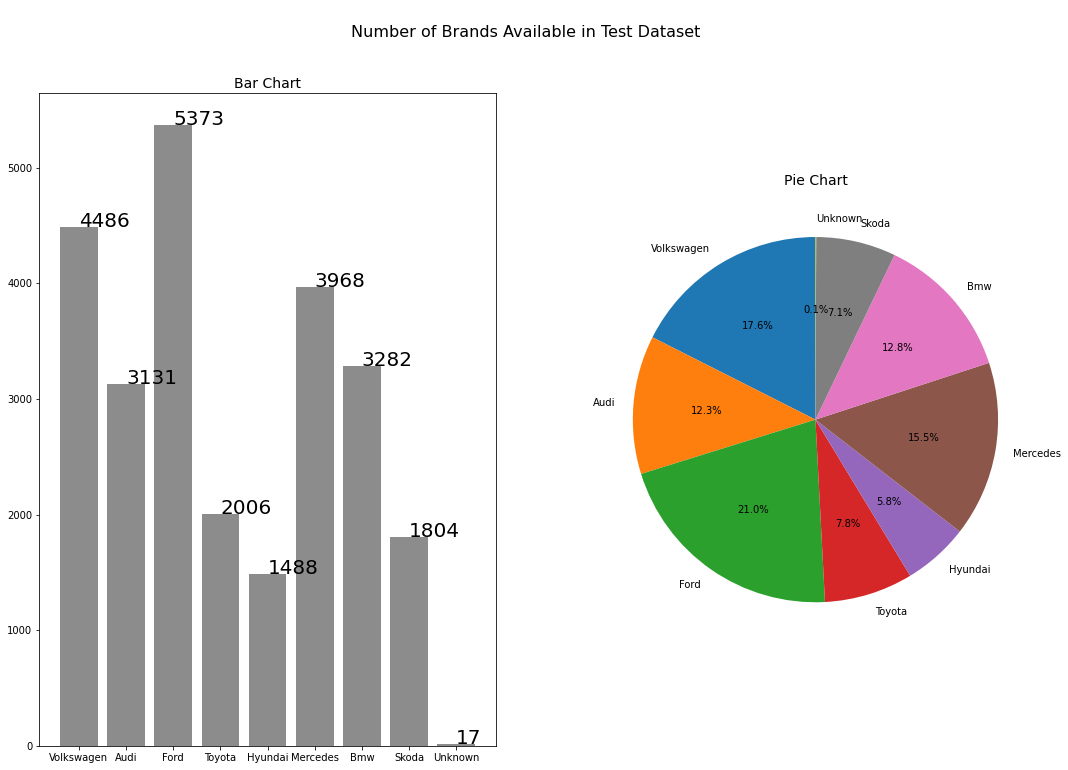

In [ ]:
Bar_points = ["Volkswagen", "Audi", "Ford", "Toyota", "Hyundai", "Mercedes", "Bmw", "Skoda", "Unknown"]
Bar_data = [test_df[test_df['brand'] == 'vw'].shape[0],test_df[test_df['brand'] == 'audi'].shape[0]
            ,test_df[test_df['brand'] == 'ford'].shape[0], test_df[test_df['brand'] == 'toyota'].shape[0],
            test_df[test_df['brand'] == 'hyundi'].shape[0], test_df[test_df['brand'] == 'merc'].shape[0],
            test_df[test_df['brand'] == 'bmw'].shape[0], test_df[test_df['brand'] == 'skoda'].shape[0],
            test_df[test_df['brand'] == 'unknown-brand'].shape[0]]
fig, axes = plt.subplots(1, 2 , sharex= False ,sharey= False, figsize = (18,12))
axes[0].bar(Bar_points, Bar_data, color = "gray", alpha = 0.9 )

for index, value in enumerate(Bar_data):
    axes[0].text(index, value, str(value), fontsize = 20)
axes[0].set_title("Bar Chart",fontsize = 14)
axes[1].pie(Bar_data, labels=Bar_points, autopct = '%1.1f%%', shadow= False , startangle=90 )
axes[1].set_title("Pie Chart",fontsize = 14)
fig.suptitle("\nNumber of Brands Available in Test Dataset\n", fontsize = 16)

plt.show()

## Test Data Preprocessing

In [ ]:
test_df.head()

,ID,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£)
0,0,ford,Edge,2017.0,Manual,18116.0,Diesel,48.7,2.0,145.0,NaN
1,1,merc,CLA Class,2020.0,Automatic,1007.0,Petrol,44.8,1.3,145.0,NaN
2,2,bmw,1 Series,2017.0,Manual,24766.0,Petrol,56.5,1.5,150.0,NaN
3,3,audi,Q3,2017.0,Manual,29860.0,Diesel,50.4,2.0,145.0,NaN
4,4,vw,Golf,2016.0,Manual,12822.0,Petrol,39.8,2.0,200.0,NaN


In [ ]:
test_df.brand.unique()

array(['ford', 'merc', 'bmw', 'audi', 'vw', 'toyota', 'skoda', 'hyundi',
       'unknown-brand'], dtype=object)

In [ ]:
def unknown_categorizer_test(row):
  if row["brand"] == "unknown-brand":
    objectbrand = "unknown-brand"
    for itervalue in vw_models:
      if itervalue == row["model"]:
        objectbrand = "vw"
    for itervalue in audi_models:
      if itervalue == row["model"]:
        objectbrand = "audi"
    for itervalue in ford_models:
      if itervalue == row["model"]:
        objectbrand = "ford"
    for itervalue in toyota_models:
      if itervalue == row["model"]:
        objectbrand = "toyota"
    for itervalue in hyundai_models:
      if itervalue == row["model"]:
        objectbrand = "hyundi"
    for itervalue in mercedes_models:
      if itervalue == row["model"]:
        objectbrand = "merc"
    for itervalue in bmw_models:
      if itervalue == row["model"]:
        objectbrand = "bmw"
    for itervalue in skoda_models:
      if itervalue == row["model"]:
        objectbrand = "skoda"
    return objectbrand
  else:
    return row["brand"]


test_df["brand"] = test_df.apply(unknown_categorizer_test, axis=1)

In [ ]:
test_df.brand.unique()

array(['ford', 'merc', 'bmw', 'audi', 'vw', 'toyota', 'skoda', 'hyundi'],
      dtype=object)

In [ ]:
test_df.isnull().sum()

ID                  0
brand               0
model              27
year               29
transmission       22
mileage            30
fuelType           23
mpg                29
engineSize         18
tax              1488
tax(£)          24067
dtype: int64

### age

In [ ]:
test_df.year.mean()

2017.1046775836403

In [ ]:
test_df.fillna({"year":2017}, inplace = True) 

In [ ]:
from datetime import datetime
def age_calculator_test(birth):
  if birth == 2030:
    return 
  return datetime.now().year - birth

test_df.rename(columns={'year': 'age'}, inplace=True)

test_df["age"] = test_df["age"].apply(age_calculator_test).astype(float)
test_df.head(10)

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£)
0,0,ford,Edge,5.0,Manual,18116.0,Diesel,48.7,2.0,145.0,NaN
1,1,merc,CLA Class,2.0,Automatic,1007.0,Petrol,44.8,1.3,145.0,NaN
2,2,bmw,1 Series,5.0,Manual,24766.0,Petrol,56.5,1.5,150.0,NaN
3,3,audi,Q3,5.0,Manual,29860.0,Diesel,50.4,2.0,145.0,NaN
4,4,vw,Golf,6.0,Manual,12822.0,Petrol,39.8,2.0,200.0,NaN
5,5,merc,E Class,3.0,Automatic,2145.0,Diesel,53.3,2.0,145.0,NaN
6,6,bmw,4 Series,6.0,Semi-Auto,18777.0,Diesel,49.6,3.0,160.0,NaN
7,7,bmw,3 Series,3.0,Semi-Auto,10579.0,Diesel,62.8,2.0,145.0,NaN
8,8,toyota,RAV4,6.0,Manual,22084.0,Diesel,60.1,2.0,125.0,NaN
9,9,audi,A3,3.0,Semi-Auto,4882.0,Diesel,52.3,1.6,145.0,NaN


In [ ]:
test_df.isnull().sum()

ID                  0
brand               0
model              27
age                 0
transmission       22
mileage            30
fuelType           23
mpg                29
engineSize         18
tax              1488
tax(£)          24067
dtype: int64

### tax conversion

In [ ]:
def tax_converter_test(row):
  if row["tax(£)"] == -2000:
    return row["tax"]
  else:
    return row["tax(£)"]*1.30  

test_df.fillna({"tax(£)":-2000}, inplace = True)

test_df["tax"] = test_df.apply(tax_converter_test, axis=1)
test_df.head(20)

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£)
0,0,ford,Edge,5.0,Manual,18116.0,Diesel,48.7,2.0,145.0,-2000.0
1,1,merc,CLA Class,2.0,Automatic,1007.0,Petrol,44.8,1.3,145.0,-2000.0
2,2,bmw,1 Series,5.0,Manual,24766.0,Petrol,56.5,1.5,150.0,-2000.0
3,3,audi,Q3,5.0,Manual,29860.0,Diesel,50.4,2.0,145.0,-2000.0
4,4,vw,Golf,6.0,Manual,12822.0,Petrol,39.8,2.0,200.0,-2000.0
5,5,merc,E Class,3.0,Automatic,2145.0,Diesel,53.3,2.0,145.0,-2000.0
6,6,bmw,4 Series,6.0,Semi-Auto,18777.0,Diesel,49.6,3.0,160.0,-2000.0
7,7,bmw,3 Series,3.0,Semi-Auto,10579.0,Diesel,62.8,2.0,145.0,-2000.0
8,8,toyota,RAV4,6.0,Manual,22084.0,Diesel,60.1,2.0,125.0,-2000.0
9,9,audi,A3,3.0,Semi-Auto,4882.0,Diesel,52.3,1.6,145.0,-2000.0


In [ ]:
test_df.drop(["tax(£)"], axis = 1, inplace=True)
test_df.head(6)

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax
0,0,ford,Edge,5.0,Manual,18116.0,Diesel,48.7,2.0,145.0
1,1,merc,CLA Class,2.0,Automatic,1007.0,Petrol,44.8,1.3,145.0
2,2,bmw,1 Series,5.0,Manual,24766.0,Petrol,56.5,1.5,150.0
3,3,audi,Q3,5.0,Manual,29860.0,Diesel,50.4,2.0,145.0
4,4,vw,Golf,6.0,Manual,12822.0,Petrol,39.8,2.0,200.0
5,5,merc,E Class,3.0,Automatic,2145.0,Diesel,53.3,2.0,145.0


In [ ]:
def tax_checker_test(row):
  if row["tax"] == 0:
    return 1  #taxfree
  else:
    return 0  #tax


test_df["taxorNot"] = test_df.apply(tax_checker_test, axis=1)
test_df = test_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'fuelType', 'mpg', 'engineSize', 'tax', 'taxorNot'])
test_df.head(20)

,ID,brand,model,age,transmission,mileage,fuelType,mpg,engineSize,tax,taxorNot
0,0,ford,Edge,5.0,Manual,18116.0,Diesel,48.7,2.0,145.0,0
1,1,merc,CLA Class,2.0,Automatic,1007.0,Petrol,44.8,1.3,145.0,0
2,2,bmw,1 Series,5.0,Manual,24766.0,Petrol,56.5,1.5,150.0,0
3,3,audi,Q3,5.0,Manual,29860.0,Diesel,50.4,2.0,145.0,0
4,4,vw,Golf,6.0,Manual,12822.0,Petrol,39.8,2.0,200.0,0
5,5,merc,E Class,3.0,Automatic,2145.0,Diesel,53.3,2.0,145.0,0
6,6,bmw,4 Series,6.0,Semi-Auto,18777.0,Diesel,49.6,3.0,160.0,0
7,7,bmw,3 Series,3.0,Semi-Auto,10579.0,Diesel,62.8,2.0,145.0,0
8,8,toyota,RAV4,6.0,Manual,22084.0,Diesel,60.1,2.0,125.0,0
9,9,audi,A3,3.0,Semi-Auto,4882.0,Diesel,52.3,1.6,145.0,0


### mileage

In [ ]:
test_df.mileage.mean()

23023.198667972574

In [ ]:
def mileage_categorizer_test(row):
  if row['age'] == 0:
    return 0 #unknown
  perf = row['mileage']/row['age']
  if perf < 5000: #low
    return 3
  elif 5000 <= perf <= 12000:
    return 2 #average
  elif 12000 < perf <= 40000:
    return 1 #average
  else:
    return  #high

test_df.fillna({"mileage": 23023.198667}, inplace = True)
test_df["mileage_class"] = test_df.apply(mileage_categorizer_test, axis=1)
test_df = test_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'mileage_class','fuelType', 'mpg', 'engineSize', 'tax', 'taxorNot'])
test_df.head(10)

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,mpg,engineSize,tax,taxorNot
0,0,ford,Edge,5.0,Manual,18116.0,3,Diesel,48.7,2.0,145.0,0
1,1,merc,CLA Class,2.0,Automatic,1007.0,3,Petrol,44.8,1.3,145.0,0
2,2,bmw,1 Series,5.0,Manual,24766.0,3,Petrol,56.5,1.5,150.0,0
3,3,audi,Q3,5.0,Manual,29860.0,2,Diesel,50.4,2.0,145.0,0
4,4,vw,Golf,6.0,Manual,12822.0,3,Petrol,39.8,2.0,200.0,0
5,5,merc,E Class,3.0,Automatic,2145.0,3,Diesel,53.3,2.0,145.0,0
6,6,bmw,4 Series,6.0,Semi-Auto,18777.0,3,Diesel,49.6,3.0,160.0,0
7,7,bmw,3 Series,3.0,Semi-Auto,10579.0,3,Diesel,62.8,2.0,145.0,0
8,8,toyota,RAV4,6.0,Manual,22084.0,3,Diesel,60.1,2.0,125.0,0
9,9,audi,A3,3.0,Semi-Auto,4882.0,3,Diesel,52.3,1.6,145.0,0


In [ ]:
test_df.isnull().sum()

ID                0
brand             0
model            27
age               0
transmission     22
mileage           0
mileage_class     0
fuelType         23
mpg              29
engineSize       18
tax               0
taxorNot          0
dtype: int64

### engine size

In [ ]:
test_df.engineSize.mean()

1.7031992794767612

In [ ]:
#test_df.fillna({"engineSize":1.7}, inplace = True)

def auto_dealer(row):
  if row["engineSize"] == -2:
    return round(test_df[(test_df["brand"] == row["brand"]) & (test_df["model"] == row["model"] )].engineSize.mean(), 2)
  else:
    return row["engineSize"]

test_df.fillna({"engineSize":-2}, inplace = True)
test_df["engineSize"] = test_df.apply(auto_dealer, axis = 1)
test_df.iloc[18524]

ID                   18524
brand                  bmw
model                   X1
age                      3
transmission     Automatic
mileage               1773
mileage_class            3
fuelType            Diesel
mpg                   65.7
engineSize            1.94
tax                    145
taxorNot                 0
Name: 18524, dtype: object

In [ ]:
def engine_checker(row):
  if row["engineSize"] < 1.3:
    return 1
  elif 1.3 <= row["engineSize"] < 1.6:
    return 2
  elif 1.6 <= row["engineSize"] < 2.0:
    return 3
  elif 2.0 <= row["engineSize"] < 20.0:
    return 4
  else:
    return 


test_df["engineClass"] = test_df.apply(engine_checker, axis=1)
test_df = test_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'mileage_class','fuelType', 'mpg', 'engineSize', 'engineClass', 'tax', 'taxorNot'])
test_df.head(20)

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,mpg,engineSize,engineClass,tax,taxorNot
0,0,ford,Edge,5.0,Manual,18116.0,3,Diesel,48.7,2.0,4,145.0,0
1,1,merc,CLA Class,2.0,Automatic,1007.0,3,Petrol,44.8,1.3,2,145.0,0
2,2,bmw,1 Series,5.0,Manual,24766.0,3,Petrol,56.5,1.5,2,150.0,0
3,3,audi,Q3,5.0,Manual,29860.0,2,Diesel,50.4,2.0,4,145.0,0
4,4,vw,Golf,6.0,Manual,12822.0,3,Petrol,39.8,2.0,4,200.0,0
5,5,merc,E Class,3.0,Automatic,2145.0,3,Diesel,53.3,2.0,4,145.0,0
6,6,bmw,4 Series,6.0,Semi-Auto,18777.0,3,Diesel,49.6,3.0,4,160.0,0
7,7,bmw,3 Series,3.0,Semi-Auto,10579.0,3,Diesel,62.8,2.0,4,145.0,0
8,8,toyota,RAV4,6.0,Manual,22084.0,3,Diesel,60.1,2.0,4,125.0,0
9,9,audi,A3,3.0,Semi-Auto,4882.0,3,Diesel,52.3,1.6,3,145.0,0


In [ ]:
test_df.isnull().sum()

ID                0
brand             0
model            27
age               0
transmission     22
mileage           0
mileage_class     0
fuelType         23
mpg              29
engineSize        0
engineClass       0
tax               0
taxorNot          0
dtype: int64

### fuel type

In [ ]:
test_df.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric', nan],
      dtype=object)

In [ ]:
test_df.fillna({"fuelType":"unknown-fuelType"}, inplace = True)


In [ ]:
def fueltype_checker(row):
  if row["fuelType"] == 'Electric':
    return 1
  elif row["fuelType"] == 'Hybrid':
    return 1
  else:
    return 0


test_df["Eco-friendly"] = test_df.apply(fueltype_checker, axis=1)
test_df = test_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'mileage_class','fuelType', "Eco-friendly", 'mpg', 'engineSize', 'engineClass', 'tax', 'taxorNot'])
test_df.head(10)

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,engineSize,engineClass,tax,taxorNot
0,0,ford,Edge,5.0,Manual,18116.0,3,Diesel,0,48.7,2.0,4,145.0,0
1,1,merc,CLA Class,2.0,Automatic,1007.0,3,Petrol,0,44.8,1.3,2,145.0,0
2,2,bmw,1 Series,5.0,Manual,24766.0,3,Petrol,0,56.5,1.5,2,150.0,0
3,3,audi,Q3,5.0,Manual,29860.0,2,Diesel,0,50.4,2.0,4,145.0,0
4,4,vw,Golf,6.0,Manual,12822.0,3,Petrol,0,39.8,2.0,4,200.0,0
5,5,merc,E Class,3.0,Automatic,2145.0,3,Diesel,0,53.3,2.0,4,145.0,0
6,6,bmw,4 Series,6.0,Semi-Auto,18777.0,3,Diesel,0,49.6,3.0,4,160.0,0
7,7,bmw,3 Series,3.0,Semi-Auto,10579.0,3,Diesel,0,62.8,2.0,4,145.0,0
8,8,toyota,RAV4,6.0,Manual,22084.0,3,Diesel,0,60.1,2.0,4,125.0,0
9,9,audi,A3,3.0,Semi-Auto,4882.0,3,Diesel,0,52.3,1.6,3,145.0,0


### MPG

In [ ]:
test_df.mpg.mean()

55.75814855441511

In [ ]:
#test_df.fillna({"mpg":55.75}, inplace = True)

def auto_dealer(row):
  if row["mpg"] == -3:
    return round(test_df[(test_df["brand"] == row["brand"]) & (test_df["model"] == row["model"] )].mpg.mean(), 2)
  else:
    return row["mpg"]

test_df.fillna({"mpg":-3}, inplace = True)
test_df["mpg"] = test_df.apply(auto_dealer, axis = 1)

In [ ]:
def mpg_checker(row):
  if row["mpg"] < 40:
    return 1
  elif 40 <= row["mpg"] < 80:
    return 2
  elif 80 <= row["mpg"] < 2000:
    return 3
  else:
    return 


test_df["mpg_class"] = test_df.apply(mpg_checker, axis=1)
test_df = test_df.reindex(columns=['ID','brand','model','age','transmission','mileage', 'mileage_class','fuelType', "Eco-friendly", 'mpg',"mpg_class" ,'engineSize', 'engineClass', 'tax', 'taxorNot'])
test_df.head(10)

,ID,brand,model,age,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot
0,0,ford,Edge,5.0,Manual,18116.0,3,Diesel,0,48.7,2,2.0,4,145.0,0
1,1,merc,CLA Class,2.0,Automatic,1007.0,3,Petrol,0,44.8,2,1.3,2,145.0,0
2,2,bmw,1 Series,5.0,Manual,24766.0,3,Petrol,0,56.5,2,1.5,2,150.0,0
3,3,audi,Q3,5.0,Manual,29860.0,2,Diesel,0,50.4,2,2.0,4,145.0,0
4,4,vw,Golf,6.0,Manual,12822.0,3,Petrol,0,39.8,1,2.0,4,200.0,0
5,5,merc,E Class,3.0,Automatic,2145.0,3,Diesel,0,53.3,2,2.0,4,145.0,0
6,6,bmw,4 Series,6.0,Semi-Auto,18777.0,3,Diesel,0,49.6,2,3.0,4,160.0,0
7,7,bmw,3 Series,3.0,Semi-Auto,10579.0,3,Diesel,0,62.8,2,2.0,4,145.0,0
8,8,toyota,RAV4,6.0,Manual,22084.0,3,Diesel,0,60.1,2,2.0,4,125.0,0
9,9,audi,A3,3.0,Semi-Auto,4882.0,3,Diesel,0,52.3,2,1.6,3,145.0,0


In [ ]:
test_df.isnull().sum()

ID                0
brand             0
model            27
age               0
transmission     22
mileage           0
mileage_class     0
fuelType          0
Eco-friendly      0
mpg               0
mpg_class         0
engineSize        0
engineClass       0
tax               0
taxorNot          0
dtype: int64

### age classification

In [ ]:
def age_class(row):
  if row["age"] < 2:
    return 4
  elif 2 <= row["age"] < 4:
    return 3
  elif 4 <= row["age"] < 15:
    return 2
  elif 15 <= row["age"] < 52:
    return 1
  else:
    return 


test_df["age_class"] = test_df.apply(age_class, axis=1)
test_df = test_df.reindex(columns=['ID','brand','model','age', "age_class",'transmission','mileage', 'mileage_class','fuelType', "Eco-friendly", 'mpg',"mpg_class" ,'engineSize', 'engineClass', 'tax', 'taxorNot'])
test_df.head(10)

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot
0,0,ford,Edge,5.0,2,Manual,18116.0,3,Diesel,0,48.7,2,2.0,4,145.0,0
1,1,merc,CLA Class,2.0,3,Automatic,1007.0,3,Petrol,0,44.8,2,1.3,2,145.0,0
2,2,bmw,1 Series,5.0,2,Manual,24766.0,3,Petrol,0,56.5,2,1.5,2,150.0,0
3,3,audi,Q3,5.0,2,Manual,29860.0,2,Diesel,0,50.4,2,2.0,4,145.0,0
4,4,vw,Golf,6.0,2,Manual,12822.0,3,Petrol,0,39.8,1,2.0,4,200.0,0
5,5,merc,E Class,3.0,3,Automatic,2145.0,3,Diesel,0,53.3,2,2.0,4,145.0,0
6,6,bmw,4 Series,6.0,2,Semi-Auto,18777.0,3,Diesel,0,49.6,2,3.0,4,160.0,0
7,7,bmw,3 Series,3.0,3,Semi-Auto,10579.0,3,Diesel,0,62.8,2,2.0,4,145.0,0
8,8,toyota,RAV4,6.0,2,Manual,22084.0,3,Diesel,0,60.1,2,2.0,4,125.0,0
9,9,audi,A3,3.0,3,Semi-Auto,4882.0,3,Diesel,0,52.3,2,1.6,3,145.0,0


In [ ]:
test_df.isnull().sum()

ID                0
brand             0
model            27
age               0
age_class         0
transmission     22
mileage           0
mileage_class     0
fuelType          0
Eco-friendly      0
mpg               0
mpg_class         0
engineSize        0
engineClass       0
tax               0
taxorNot          0
dtype: int64

### transmission

In [ ]:
test_df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', nan, 'Other'], dtype=object)

In [ ]:
def transmission_converter(row):
  if row["transmission"] == 'Manual':
    return 2
  elif row["transmission"] == 'Semi-Auto':
    return 3
  elif row["transmission"] == 'Automatic':
    return 4
  elif row["transmission"] == 'Other':
    return 1
  else:
    return 1


test_df["transmission"] = test_df.apply(transmission_converter, axis=1)
test_df.head(10)

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot
0,0,ford,Edge,5.0,2,2,18116.0,3,Diesel,0,48.7,2,2.0,4,145.0,0
1,1,merc,CLA Class,2.0,3,4,1007.0,3,Petrol,0,44.8,2,1.3,2,145.0,0
2,2,bmw,1 Series,5.0,2,2,24766.0,3,Petrol,0,56.5,2,1.5,2,150.0,0
3,3,audi,Q3,5.0,2,2,29860.0,2,Diesel,0,50.4,2,2.0,4,145.0,0
4,4,vw,Golf,6.0,2,2,12822.0,3,Petrol,0,39.8,1,2.0,4,200.0,0
5,5,merc,E Class,3.0,3,4,2145.0,3,Diesel,0,53.3,2,2.0,4,145.0,0
6,6,bmw,4 Series,6.0,2,3,18777.0,3,Diesel,0,49.6,2,3.0,4,160.0,0
7,7,bmw,3 Series,3.0,3,3,10579.0,3,Diesel,0,62.8,2,2.0,4,145.0,0
8,8,toyota,RAV4,6.0,2,2,22084.0,3,Diesel,0,60.1,2,2.0,4,125.0,0
9,9,audi,A3,3.0,3,3,4882.0,3,Diesel,0,52.3,2,1.6,3,145.0,0


In [ ]:
test_df.isnull().sum()

ID                0
brand             0
model            27
age               0
age_class         0
transmission      0
mileage           0
mileage_class     0
fuelType          0
Eco-friendly      0
mpg               0
mpg_class         0
engineSize        0
engineClass       0
tax               0
taxorNot          0
dtype: int64

### last procedures

In [ ]:
def segment_converter(row):
  if row["brand"] == 'vw':
    return 2
  elif row["brand"] == 'audi':
    return 3
  elif row["brand"] == 'ford':
    return 2
  elif row["brand"] == 'toyota':
    return 1
  elif row["brand"] == 'hyundi':
    return 1
  elif row["brand"] == 'merc':
    return 3
  elif row["brand"] == 'bmw':
    return 3
  elif row["brand"] == 'skoda':
    return 2

def brand_converter(row):
  if row["brand"] == 'vw':
    return 5
  elif row["brand"] == 'audi':
    return 6
  elif row["brand"] == 'ford':
    return 3
  elif row["brand"] == 'toyota':
    return 2
  elif row["brand"] == 'hyundi':
    return 1
  elif row["brand"] == 'merc':
    return 8
  elif row["brand"] == 'bmw':
    return 7
  elif row["brand"] == 'skoda':
    return 4
test_df["segment"] = test_df.apply(segment_converter, axis=1)  
test_df["brand"] = test_df.apply(brand_converter, axis=1)
test_df.brand.unique()

array([3, 8, 7, 6, 5, 2, 4, 1])

In [ ]:
test_df.head(5)

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,segment
0,0,3,Edge,5.0,2,2,18116.0,3,Diesel,0,48.7,2,2.0,4,145.0,0,2
1,1,8,CLA Class,2.0,3,4,1007.0,3,Petrol,0,44.8,2,1.3,2,145.0,0,3
2,2,7,1 Series,5.0,2,2,24766.0,3,Petrol,0,56.5,2,1.5,2,150.0,0,3
3,3,6,Q3,5.0,2,2,29860.0,2,Diesel,0,50.4,2,2.0,4,145.0,0,3
4,4,5,Golf,6.0,2,2,12822.0,3,Petrol,0,39.8,1,2.0,4,200.0,0,2


In [ ]:
test_df["popularity"] = test_df.apply(popularity_converter, axis = 1)
test_df.head()

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,segment,popularity
0,0,3,Edge,5.0,2,2,18116.0,3,Diesel,0,48.7,2,2.0,4,145.0,0,2,22
1,1,8,CLA Class,2.0,3,4,1007.0,3,Petrol,0,44.8,2,1.3,2,145.0,0,3,20
2,2,7,1 Series,5.0,2,2,24766.0,3,Petrol,0,56.5,2,1.5,2,150.0,0,3,91
3,3,6,Q3,5.0,2,2,29860.0,2,Diesel,0,50.4,2,2.0,4,145.0,0,3,131
4,4,5,Golf,6.0,2,2,12822.0,3,Petrol,0,39.8,1,2.0,4,200.0,0,2,94


In [ ]:
def model_converter(row):
  if row["brand"] == 5:
    i = 0
    while i < len(vw_models):
      if vw_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 6:
    i = 0
    while i < len(audi_models):
      if audi_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 3:
    i = 0
    while i < len(ford_models):
      if ford_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 2:
    i = 0
    while i < len(toyota_models):
      if toyota_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 1:
    i = 0
    while i < len(hyundai_models):
      if hyundai_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 8:
    i = 0
    while i < len(mercedes_models):
      if mercedes_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 7:
    i = 0
    while i < len(bmw_models):
      if bmw_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  elif row["brand"] == 4:
    i = 0
    while i < len(skoda_models):
      if skoda_models[i] == row["model"]:
        return i + 1
      i = i+1
    return 
  
test_df["model"] = test_df.apply(model_converter, axis=1)
test_df.isnull().sum()

ID                0
brand             0
model            27
age               0
age_class         0
transmission      0
mileage           0
mileage_class     0
fuelType          0
Eco-friendly      0
mpg               0
mpg_class         0
engineSize        0
engineClass       0
tax               0
taxorNot          0
segment           0
popularity        0
dtype: int64

In [ ]:
test_df.model.mean()

8.99001096834848

In [ ]:
test_df.head()

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,segment,popularity
0,0,3,4.0,5.0,2,2,18116.0,3,Diesel,0,48.7,2,2.0,4,145.0,0,2,22
1,1,8,5.0,2.0,3,4,1007.0,3,Petrol,0,44.8,2,1.3,2,145.0,0,3,20
2,2,7,1.0,5.0,2,2,24766.0,3,Petrol,0,56.5,2,1.5,2,150.0,0,3,91
3,3,6,10.0,5.0,2,2,29860.0,2,Diesel,0,50.4,2,2.0,4,145.0,0,3,131
4,4,5,13.0,6.0,2,2,12822.0,3,Petrol,0,39.8,1,2.0,4,200.0,0,2,94


In [ ]:
#test_df.fillna({"model":9}, inplace = True)
def model_dealer(row):
  if row["model"] == -5:
    return int(test_df[test_df["brand"] == row["brand"]].model.mean())
  else:
    return row["model"]

test_df.fillna({"model":-5}, inplace = True)
test_df["model"] = test_df.apply(model_dealer, axis = 1)

In [ ]:
test_df.head()

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,segment,popularity
0,0,3,4.0,5.0,2,2,18116.0,3,Diesel,0,48.7,2,2.0,4,145.0,0,2,22
1,1,8,5.0,2.0,3,4,1007.0,3,Petrol,0,44.8,2,1.3,2,145.0,0,3,20
2,2,7,1.0,5.0,2,2,24766.0,3,Petrol,0,56.5,2,1.5,2,150.0,0,3,91
3,3,6,10.0,5.0,2,2,29860.0,2,Diesel,0,50.4,2,2.0,4,145.0,0,3,131
4,4,5,13.0,6.0,2,2,12822.0,3,Petrol,0,39.8,1,2.0,4,200.0,0,2,94


In [ ]:
test_df.isnull().sum()

ID               0
brand            0
model            0
age              0
age_class        0
transmission     0
mileage          0
mileage_class    0
fuelType         0
Eco-friendly     0
mpg              0
mpg_class        0
engineSize       0
engineClass      0
tax              0
taxorNot         0
segment          0
popularity       0
dtype: int64

## Final Step

In [ ]:
test_df.head()

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,segment,popularity
0,0,3,4.0,5.0,2,2,18116.0,3,Diesel,0,48.7,2,2.0,4,145.0,0,2,22
1,1,8,5.0,2.0,3,4,1007.0,3,Petrol,0,44.8,2,1.3,2,145.0,0,3,20
2,2,7,1.0,5.0,2,2,24766.0,3,Petrol,0,56.5,2,1.5,2,150.0,0,3,91
3,3,6,10.0,5.0,2,2,29860.0,2,Diesel,0,50.4,2,2.0,4,145.0,0,3,131
4,4,5,13.0,6.0,2,2,12822.0,3,Petrol,0,39.8,1,2.0,4,200.0,0,2,94


In [ ]:
test_df.isnull().sum()

ID               0
brand            0
model            0
age              0
age_class        0
transmission     0
mileage          0
mileage_class    0
fuelType         0
Eco-friendly     0
mpg              0
mpg_class        0
engineSize       0
engineClass      0
tax              0
taxorNot         0
segment          0
popularity       0
dtype: int64

In [ ]:
def fueltype_converter(row):
  if row["fuelType"] == 'Petrol':
    return 1
  elif row["fuelType"] == 'Diesel':
    return 2
  elif row["fuelType"] == 'Hybrid':
    return 3
  elif row["fuelType"] == 'Electric':
    return 4
  elif row["fuelType"] == 'Other':
    return 5
  else:
    return 5

test_df["fuelType"] = test_df.apply(fueltype_converter, axis=1)
test_df.head(10)

,ID,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,segment,popularity
0,0,3,4.0,5.0,2,2,18116.0,3,2,0,48.7,2,2.0,4,145.0,0,2,22
1,1,8,5.0,2.0,3,4,1007.0,3,1,0,44.8,2,1.3,2,145.0,0,3,20
2,2,7,1.0,5.0,2,2,24766.0,3,1,0,56.5,2,1.5,2,150.0,0,3,91
3,3,6,10.0,5.0,2,2,29860.0,2,2,0,50.4,2,2.0,4,145.0,0,3,131
4,4,5,13.0,6.0,2,2,12822.0,3,1,0,39.8,1,2.0,4,200.0,0,2,94
5,5,8,9.0,3.0,3,4,2145.0,3,2,0,53.3,2,2.0,4,145.0,0,3,135
6,6,7,4.0,6.0,2,3,18777.0,3,2,0,49.6,2,3.0,4,160.0,0,3,128
7,7,7,3.0,3.0,3,3,10579.0,3,2,0,62.8,2,2.0,4,145.0,0,3,108
8,8,2,13.0,6.0,2,2,22084.0,3,2,0,60.1,2,2.0,4,125.0,0,1,100
9,9,6,3.0,3.0,3,3,4882.0,3,2,0,52.3,2,1.6,3,145.0,0,3,95


In [ ]:
def last_converter(row):
  if row["mileage"] < 15000:
    return 4
  elif 15000 <= row["mileage"] < 45000:
    return 3
  elif 45000 <= row["mileage"] < 85000:
    return 2
  else:
    return 1
  
test_df["life"] = test_df.apply(last_converter, axis = 1)

In [ ]:
"""
def model_converter(row):
  if row["brand"] == 5:
    return row["model"] + 69 
  elif row["brand"] == 6:
    return row["model"] + 96 
  elif row["brand"] == 3:
    return row["model"] + 34 
  elif row["brand"] == 2:
    return row["model"] + 16 
  elif row["brand"] == 1:
    return row["model"] 
  elif row["brand"] == 8:
    return row["model"] + 146 
  elif row["brand"] == 7:
    return row["model"] + 122
  elif row["brand"] == 4:
    return row["model"] + 57

test_df["popularity"] = test_df.apply(model_converter, axis = 1)
test_df.head()
"""

'\ndef model_converter(row):\n  if row["brand"] == 5:\n    return row["model"] + 69 \n  elif row["brand"] == 6:\n    return row["model"] + 96 \n  elif row["brand"] == 3:\n    return row["model"] + 34 \n  elif row["brand"] == 2:\n    return row["model"] + 16 \n  elif row["brand"] == 1:\n    return row["model"] \n  elif row["brand"] == 8:\n    return row["model"] + 146 \n  elif row["brand"] == 7:\n    return row["model"] + 122\n  elif row["brand"] == 4:\n    return row["model"] + 57\n\ntest_df["popularity"] = test_df.apply(model_converter, axis = 1)\ntest_df.head()\n'

In [ ]:
Xtest = test_df.drop(["ID"], axis = 1)
#Xtest = Xtest.drop(["mileage_class"], axis = 1)
Xtest.head()

,brand,model,age,age_class,transmission,mileage,mileage_class,fuelType,Eco-friendly,mpg,mpg_class,engineSize,engineClass,tax,taxorNot,segment,popularity,life
0,3,4.0,5.0,2,2,18116.0,3,2,0,48.7,2,2.0,4,145.0,0,2,22,3
1,8,5.0,2.0,3,4,1007.0,3,1,0,44.8,2,1.3,2,145.0,0,3,20,4
2,7,1.0,5.0,2,2,24766.0,3,1,0,56.5,2,1.5,2,150.0,0,3,91,3
3,6,10.0,5.0,2,2,29860.0,2,2,0,50.4,2,2.0,4,145.0,0,3,131,3
4,5,13.0,6.0,2,2,12822.0,3,1,0,39.8,1,2.0,4,200.0,0,2,94,4


In [ ]:
pred_test = reg2.predict(Xtest)

In [ ]:
pred_test.size

25555

In [ ]:
Finalcheck = pd.DataFrame({'ID':test_df.ID.values.reshape(-1), 'price':pred_test.reshape(-1)})

In [ ]:
Finalcheck.head()

,ID,price
0,0,20235.305000
1,1,31375.876875
2,2,13846.202500
3,3,20171.537500
4,4,20734.110000


In [ ]:
Finalcheck.isnull().sum()

ID       0
price    0
dtype: int64

In [ ]:
Finalcheck.shape

(25555, 2)

In [ ]:
Finalcheck.to_csv(r'submission14.csv', index = False)

In [ ]:
ls

submission14.csv  test.csv  train.csv


In [ ]:
prediction_csv = pd.read_csv("submission14.csv")
prediction_csv.head(20)

,ID,price
0,0,20235.305000
1,1,31375.876875
2,2,13846.202500
3,3,20171.537500
4,4,20734.110000
5,5,37027.845000
6,6,22170.822500
7,7,23018.530000
8,8,15579.627500
9,9,22408.427500
